#**Introdução**

Este projeto foi concebido como parte do meu curso de pós-graduação em Engenharia de Dados na PUC-Rio, focando em três pilares principais: banco de dados, data warehouse e data lake, e gestão e governança de dados. Ele representa uma oportunidade única para aplicar os conceitos teóricos aprendidos em um cenário prático, utilizando dados reais do mercado de comércio eletrônico brasileiro. Optei por focar no setor de e-commerce não apenas devido à sua relevância e crescimento explosivo nos últimos anos, mas também porque os dados estão prontamente disponíveis e não apresentam questões de confidencialidade. Além de fornecer uma plataforma para melhorar minhas habilidades em manipulação e análise de dados, este projeto também me permite explorar algumas das tendências emergentes em ciência de dados e big data, incluindo a automação, computação em nuvem e ferramentas específicas do GCP (Google Cloud Platform).

#**Objetivo**
O principal objetivo deste projeto é utilizar dados da maior plataforma de comércio eletrônico do Brasil, a Olist, que foram obtidos através da plataforma Kaggle, para realizar análises de tendências e desempenho de vendas. Devido às limitações de recursos (usando a versão de teste do GCP), nosso escopo de análise se concentrará em:

1. Análise de tendências de vendas, incluindo volume de vendas, receita e custos de frete.
2. Análise de desempenho de vendas, incluindo classificações de vendedores e desempenho de categorias de produtos.
3. Reação dos clientes ao tempo de entrega.

**Definição do Problema**

Este projeto responderá às seguintes questões de negócios:

1. como esta o desempenho de vendas do ano 2018?
2. Quais categorias de produtos têm o melhor desempenho em termos de volume de pedidos e receita?
3. Como os clientes reagem ao tempo de entrega? Isso está relacionado à satisfação do cliente?

Devido às limitações de recursos do GCP e tempo limitado, a análise atual é baseada principalmente nas perguntas que podem ser respondidas com os recursos disponíveis. Os resultados da análise serão armazenados no Bucket do GCP (Data Lake) e no BigQuery (Data Warehouse).

Data Source: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

* olist_order_items_dataset.csv
* olist_orders_dataset.csv
* olist_products_dataset.csv
* olist_sellers_dataset.csv
* product_category_name_translation.csv
* olist_order_reviews_dataset.csv
* olist_order_payments_dataset.csv
* olist_geolocation_dataset.csv
* olist_customers_dataset.csv

# **Modelagem de Dados para Análise de e-Commerce**

Neste projeto de análise de comércio eletrônico, optamos por usar o Esquema Estrela como a estrutura do nosso Modelagem.

**Tabela de Fatos (Fact Table)**

Tabela de Fatos de Itens de Pedido:

Esta tabela de fatos é baseada no arquivo olist_order_items_dataset.csv, que contém múltiplos atributos de itens de pedido, como ID do pedido, ID do produto, preço e quantidade, etc.

**Tabelas de Dimensão (Dimension Tables)**

1. Dimensão de Pedidos: Contém dados do arquivo olist_orders_dataset.csv, como data do pedido, status do pedido, etc.
2. Dimensão de Produtos: Contém dados dos arquivos olist_products_dataset.csv e product_category_name_translation.csv, como nome do produto, categoria, etc.
3. Dimensão de Clientes: Contém dados do arquivo olist_customers_dataset.csv, como nome do cliente, endereço, etc.
4. Dimensão de Vendedores: Contém dados do arquivo olist_sellers_dataset.csv, como nome do vendedor, endereço, etc.
5. Dimensão de Avaliações: Contém dados do arquivo olist_order_reviews_dataset.csv, como pontuação de avaliação, texto de avaliação, etc.
6. Dimensão de Pagamentos: Contém dados do arquivo olist_order_payments_dataset.csv, como tipo de pagamento, valor do pagamento, etc.
7. Dimensão de Geolocalização: Contém dados do arquivo olist_geolocation_dataset.csv, como CEP, latitude e longitude, etc.

Essas tabelas de dimensão estão conectadas à nossa única tabela de fatos por meio de chaves estrangeiras (Foreign Keys), formando um esquema estrela.


A seguir está um modelo estruturado construído usando o Esquema Estrela, esse tipo de modelo é usado para aplicações de Inteligência de Negócios. Ele é composto por uma tabela de fatos central (Tabela de Fatos -> List order_items) e uma ou mais tabelas de dimensões (Tabelas de Dimensão). Através deste modelo, será mais fácil entender rapidamente as relações entre cada tabela.

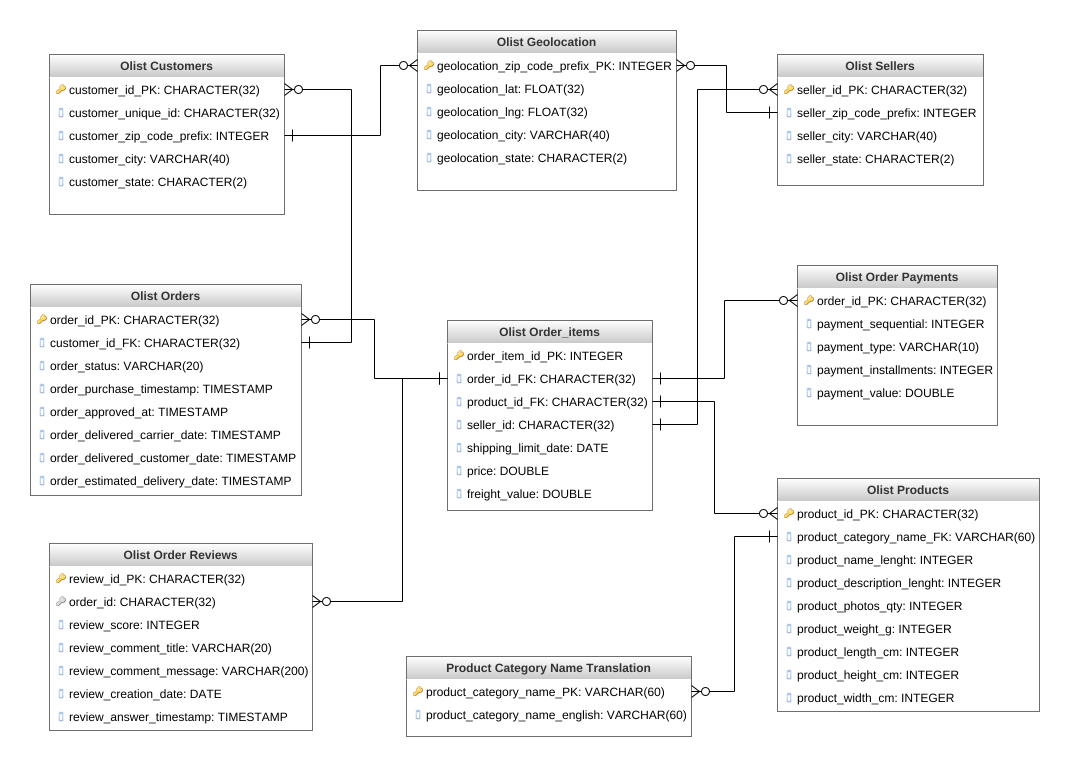

### **Desenvolvimento e Testes no Dataproc do GCP via Jupyter Notebook**

Antes da implementação final do pipeline ETL e da execução das consultas SQL, todas as etapas de desenvolvimento e testes foram realizadas no ambiente Jupyter Notebook fornecido pela Google Cloud Platform (GCP), utilizando PySpark. Esta fase inicial garante tanto a praticidade quanto a eficácia dos procedimentos de transformação de dados, operações de consulta e outros componentes integrais do pipeline de dados.

Durante esta fase de desenvolvimento, os seguintes elementos foram rigorosamente testados:

* Extração de dados.
* Transformações de dados, incluindo limpeza e formatação.
Consultas SQL para análise de tendências e desempenho de vendas.
* Após a validação bem-sucedida no ambiente de desenvolvimento, o código foi então movido para a produção para aplicação em grande escala.

[Pré-Implementação: Desenvolvimento e Teste no Jupyter Notebook via GCP Dataproc, Click aqui para conhecer](https://github.com/leticia-chen/MVP-EngenhariaDeDados/blob/main/Dvelopment%20Stage/mvp_etl_query_develop.ipynb)

# **Carga de Dados**

Primeiramente, importa todos os arquivos CSV de dados para um Bucket na GCP (Google Cloud Platform), servindo como nosso Data Lake.

###Como upload os arquivos de datasets atraves terminal de computador local

Segue paso ao paso:

**1st, crie uma "key":**

1. Acesse o Console do GCP: Abra seu navegador e acesse o Console do Google Cloud.
2. Selecione seu projeto: No menu suspenso na parte superior, selecione o projeto do GCP para o qual você deseja criar uma chave.
3. Navegue até "IAM & Admin": No menu lateral, localize e clique em "IAM & Admin".
4. Selecione "Service Accounts": Dentro de "IAM & Admin", você verá a opção "Service Accounts". Clique nela.
5. Crie ou selecione uma conta de serviço: Se você ainda não tem uma conta de serviço, pode optar por criar uma. Se já tiver uma, selecione a conta de serviço para a qual deseja criar uma chave.
6. Crie uma chave: Clique na conta de serviço selecionada e procure a opção "Create key" ou "Add key". Normalmente, essa opção estará na aba "Keys" da página de detalhes.
7. Selecione o tipo de chave: Você terá a opção de escolher o formato da chave, normalmente JSON ou P12. Escolha o formato desejado e clique em "CREATE".
8. Baixe e armazene a chave: A chave será automaticamente baixada para o seu computador. Guarde este arquivo de chave em um local seguro, pois ele será usado para acessar seus serviços do GCP.

**2nd, Prepare Python script: upload_files.py**

In [ ]:
from google.cloud import storage
import os

def upload_files(request):
    storage_client = storage.Client()
    bucket = storage_client.bucket('your_bucket_name')

    local_directory_path = '/tmp/local_folder'

    for filename in os.listdir(local_directory_path):
        if filename.endswith('.csv'):
            local_file_path = os.path.join(local_directory_path, filename)
            blob_name = os.path.join('gcp_folder', filename)
            blob = bucket.blob(blob_name)
            blob.upload_from_filename(local_file_path)

    return 'Files uploaded', 200

**3rd, Subir Python script no terminal**

In [ ]:
# Do terminal, faça o upload de arquivos para o GCS, execute os códigos abaixo:

pip3 install google-cloud-storage
export GOOGLE_APPLICATION_CREDENTIALS="/path/to/your/credentials.json"

# Antes executar o codigo abaixo, vá para o bucket e coloque a 'Service Account' da chave dentro do 'Principal' do bucket.

python3 upload_files.py


In [ ]:
# Insera "Service Account" criado no 'Principal' do bucket
Acesse bucket
Click PERMISSIONS->GRANT ACCESS -> Add 'service account' para Principals
-> Assign roles: select Cloud storage->storage object creator


Service Account: name@project ID.iam.gserviceaccount.com (dentro de dentro de IAM & Adimin)

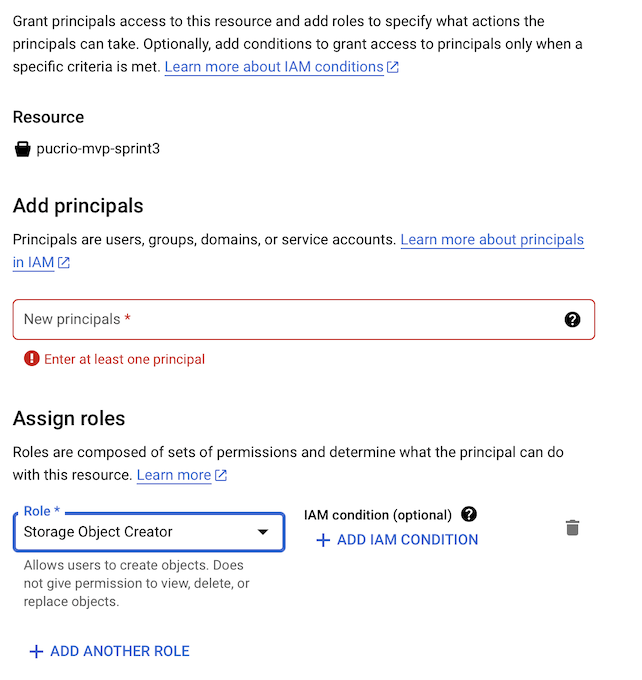

In [ ]:
# Como agendar processo de upload dataset files para gcs bucket:

crontab -e
GOOGLE_APPLICATION_CREDENTIALS="/path/to/your/credentials.json"
0 17 * * * /usr/bin/python3 /path/to/your/upload_files.py

(se for MAC, usa: 'which python3' para obter cominho correto)

###Resultado de upload no terminal

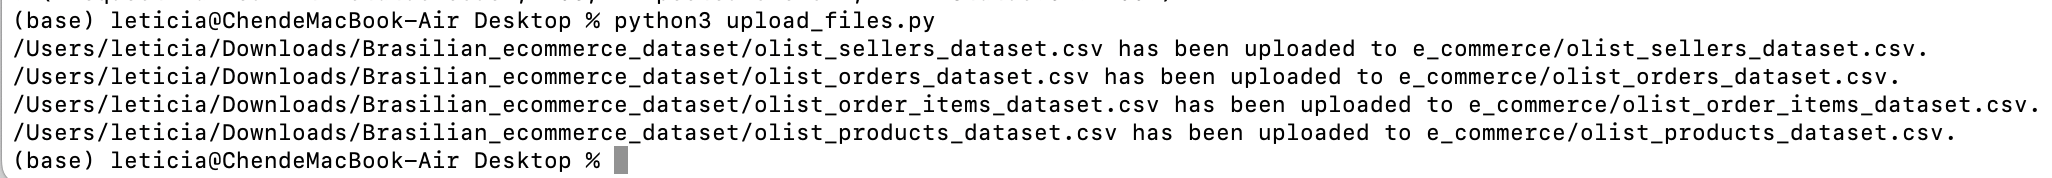

###Resultado de upload no gcs bucket

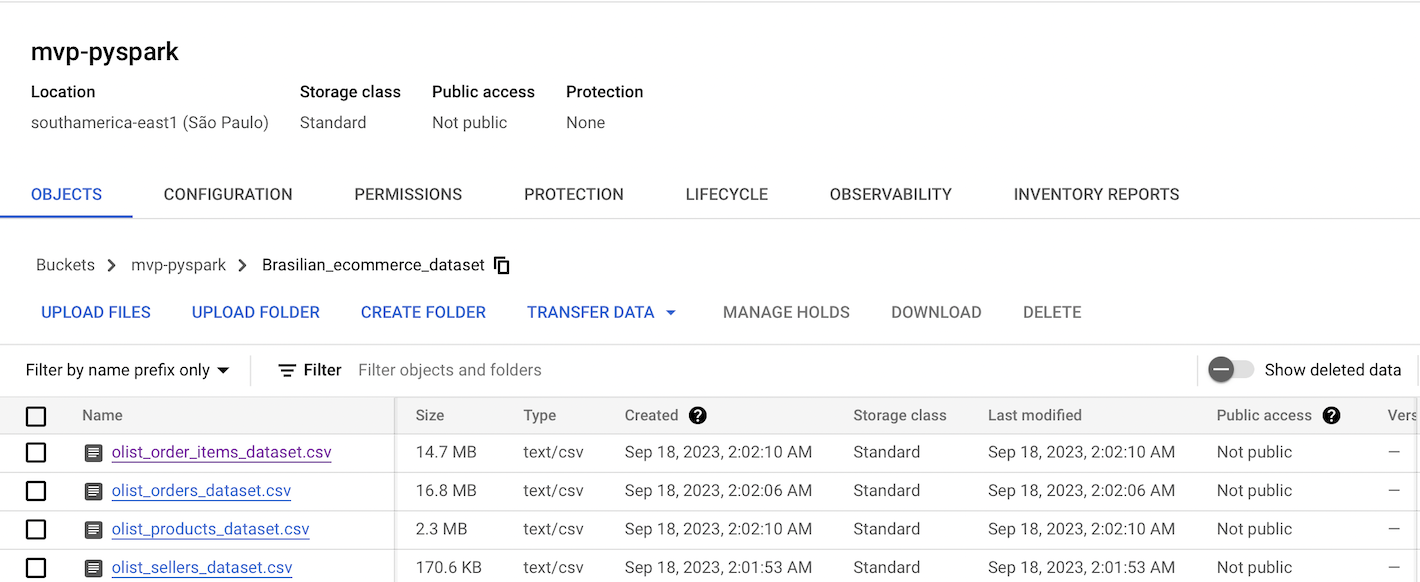

# **Criar Cluster no GCP Dataproc**

Entrar Dataproc e clicar '+CREATE CLUSTER'

A lista e as imagens abaixo mostram as condições que escolhi ao criar o cluster. Como tenho uma conta de teste, optei por condições de configuração mais baixas.

* Name: 	dar um nome para seu cluster
* Location: 	southamerica-east1
* Cluster type: 	Standard
* Versioning: 	Ubuntu 2.1
* Component Gateway: 	Enable
* Optional components: 	Jupyter notebook
* Manager node, series: 	N2 or E2
* Machine type: 	N2 or E2
* Primary disk size: 	100 GB
* Worker nodes, series: 	N2 or E2
* Machine type: 	N2 or E2
* Number of worker nodes: 	2

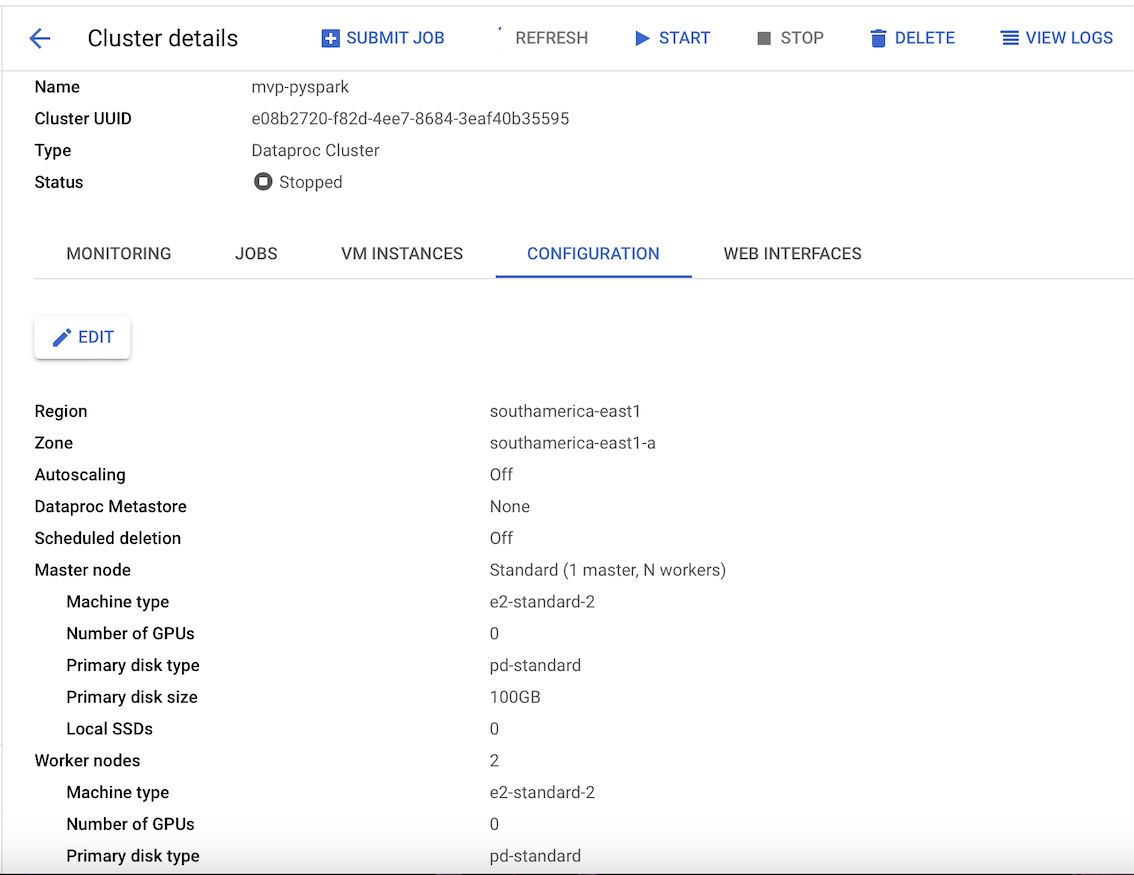

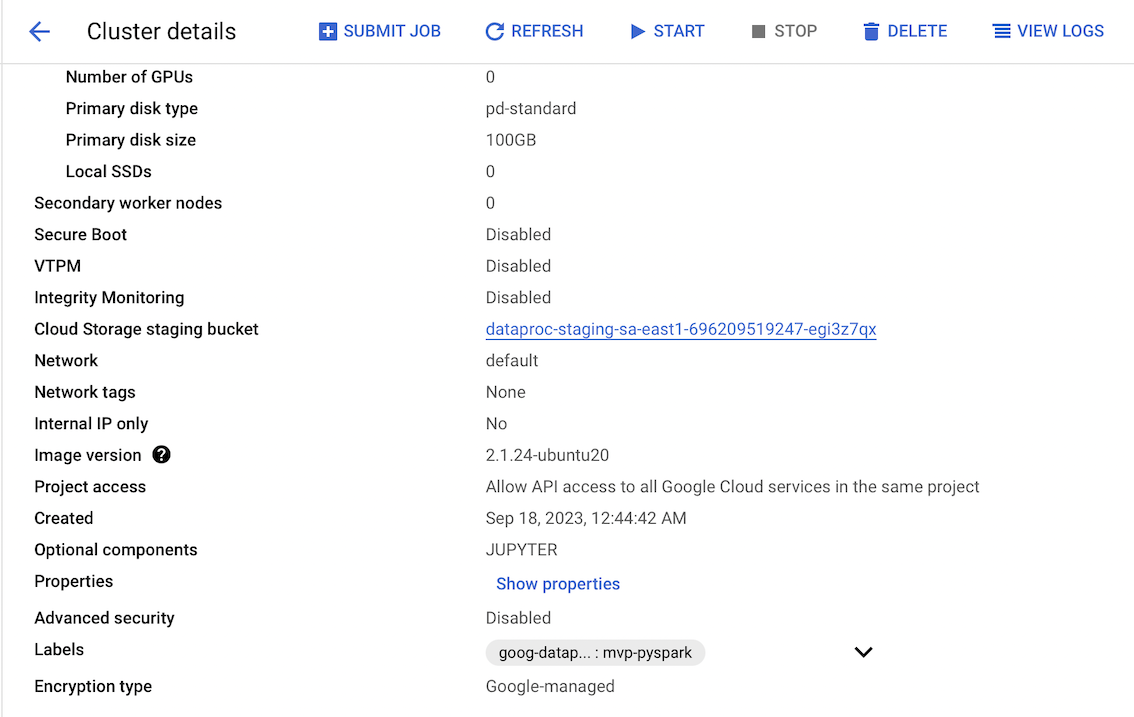

# **Análise de Dados**

Antes de extrair dados do Data Lake (GCS) e importá-los para nosso armazém de dados (BigQuery), precisa realizar uma série de trabalhos de limpeza e pré-processamento para garantir a consistência e a precisão dos dados.

Em um ambiente PySpark, use df.printSchema() para verificar se os tipos de dados estão corretos.

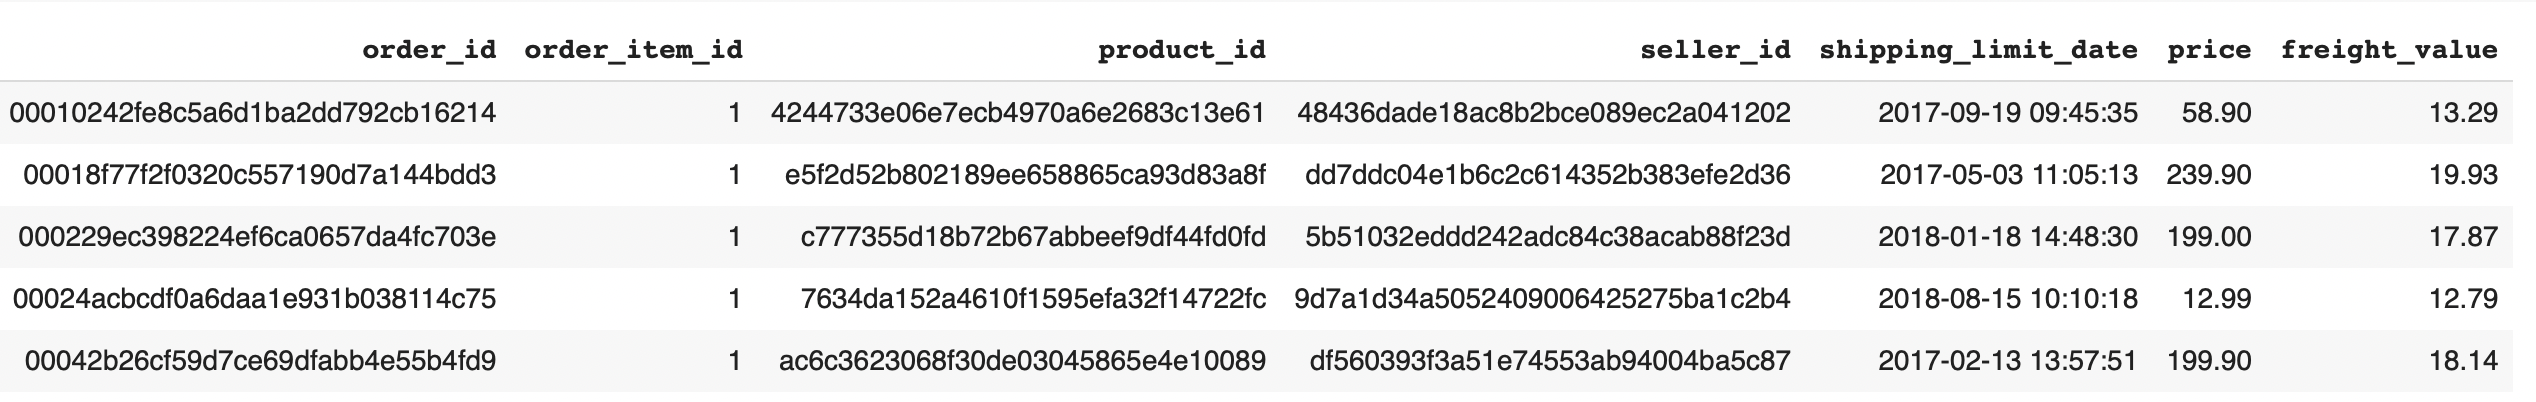

In [ ]:
# Schema do olist_order_items_dataset.csv

root
 |-- order_id: string (nullable = false)
 |-- order_item_id: string (nullable = false)
 |-- product_id: string (nullable = false)
 |-- seller_id: string (nullable = false)
 |-- shipping_limit_date: string (nullable = false)
 |-- price: string (nullable = false)
 |-- freight_value: string (nullable = false)

In [ ]:
# Schema do olist_orders_dataset.csv

root
 |-- order_id: string (nullable = false)
 |-- customer_id: string (nullable = false)
 |-- order_status: string (nullable = false)
 |-- order_purchase_timestamp: string (nullable = false)
 |-- order_approved_at: string (nullable = false)
 |-- order_delivered_carrier_date: string (nullable = false)
 |-- order_delivered_customer_date: string (nullable = false)
 |-- order_estimated_delivery_date: string (nullable = false)

In [ ]:
# Schema do olist_sellers_dataset.csv

root
 |-- seller_id: string (nullable = false)
 |-- seller_zip_code_prefix: string (nullable = false)
 |-- seller_city: string (nullable = false)
 |-- seller_state: string (nullable = false)

In [ ]:
# Schema do olist_products_dataset.csv

root
 |-- product_id: string (nullable = false)
 |-- product_category_name: string (nullable = false)
 |-- product_name_lenght: string (nullable = false)
 |-- product_description_lenght: string (nullable = false)
 |-- product_photos_qty: string (nullable = false)
 |-- product_weight_g: string (nullable = false)
 |-- product_length_cm: string (nullable = false)
 |-- product_height_cm: string (nullable = false)
 |-- product_width_cm: string (nullable = false)

A partir das informações do esquema, percebe-se que alguns tipos de dados das colunas não estão corretos após a leitura, então é necessário tratar isso durante a etapa de transformação. Além disso, as partes de dados que estão faltando serão preenchidas com 'null'. Adicionalmente, como o projeto não envolve aprendizado de máquina nesta fase, não será realizado o tratamento de "one-hot encoding".

Devido ao fato de que cada arquivo de dados pode conter mais de 112.650 linhas, decidiu-se manter apenas os atributos (colunas) necessários ao criar novas tabelas para análise de consultas.

**Em resposta à primeira pergunta - Criar a tabela trend_analysis**

O objetivo de criar a tabela trend_analysis é para entender as dinâmicas dos negócios ao longo do tempo. Esta tabela resulta de uma operação de junção entre

- olist_order_items_dataset.csv
- olist_orders_dataset.csv.

Através desta tabela, podemos realizar diversas análises de séries temporais, incluindo, mas não limitado a, relatórios de vendas trimestrais e crescimento anual de receita.

As colunas incluídas nesta tabela, como sales_quantity, revenue, freight_cost e order_approved_at, foram cuidadosamente selecionadas. Em particular, o timestamp order_approved_at nos permite aprofundar nosso entendimento de como melhorar estratégias de vendas dentro de períodos de tempo específicos.

**Em resposta à segunda pergunta - Criar a tabela sales_performance**

O objetivo de criar a tabela sales_performance é fornecer uma visão abrangente para avaliar o desempenho de vendas de diferentes categorias de produtos e vendedores. Esta tabela resulta de uma operação de junção entre

- olist_order_items_dataset.csv
- olist_products_dataset.csv
- olist_sellers_dataset.csv

Através desta tabela, podemos realizar análises de vendas multidimensionais, como quais categorias de produtos são mais populares, quais vendedores têm o melhor desempenho de vendas, ou em quais regiões existem mais pedidos.

As colunas selecionadas como order_id, product_id, seller_id, product_category_name, price, shipping_limit_date e seller_state têm propósitos específicos. Por exemplo, seller_state é utilizado para análises de localização geográfica, o que é muito útil para entender quais regiões têm vendedores ou compradores mais ativos.

**Em resposta à terceira pergunta - Criar a tabela de Análise do Tempo Médio de Entrega por Estado**

O objetivo de criar esta tabela é compreender o impacto do tempo de entrega na satisfação do cliente. A tabela é gerada a partir de uma junção entre

- olist_orders_dataset.csv
- olist_order_reviews_dataset.csv

Esta tabela nos permite analisar como os diferentes tempos de entrega afetam as avaliações dos clientes, o que é crucial para otimizar a logística e aumentar a satisfação do cliente.

As colunas mantidas após a junção incluem order_id, order_purchase_date, order_delivered_customer_date e review_score. Estes campos são essenciais para calcular o tempo médio de entrega e correlacioná-lo com a pontuação de revisão do cliente. Através desta tabela, podemos realizar consultas que nos ajudam a entender melhor como otimizar nosso tempo de entrega para melhorar a experiência do cliente.

#**Desenvolvimento de ETL pipeline e submete-lo como Dataproc Job**

Na implementação do ETL, foram adotadas duas abordagens. A primeira envolve escrever o ETL como um script Python, submetê-lo como um job e então criar um fluxo de trabalho e um agendador na nuvem para execução automática (criando a primeira e a segunda tabela). A segunda abordagem utiliza o Dataprep para criar o ETL em um ambiente visual (gerando a terceira tabela).

##Método 1: Escreva o pipeline ETL em um script Python e, em seguida, 'submit a job', depois combine o uso de workflow e Cloud Scheduler para alcançar automação

###1.Python script de ETL pipeline desenvolvido

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType, FloatType, TimestampType
from pyspark.sql.functions import col, year, month
from pyspark.sql import functions as F


BUCKET_PATH = "gs://mvp-pyspark/Brasilian_ecommerce_dataset/"


# Transform to create trend_analysis table
def transformation_trendAnalysis(df_items, df_orders):

    # Remove duplicate order_ids
    df_items = df_items.dropDuplicates(['order_id'])
    df_orders = df_orders.dropDuplicates(['order_id'])

    transform_join = df_items.join(df_orders, df_items.order_id == df_orders.order_id, "inner") \
                            .select(
                            [
                                df_items.order_id.alias("sales_quantity"),
                                df_items.price.alias("revenue"),
                                df_items.freight_value.alias("freight_cost"),
                                df_orders.order_approved_at
                            ]
    )

    # Casting columns to their appropriate data types
    transformWithColumn = (transform_join
                      .withColumn("revenue", col("revenue").cast(FloatType()))
                      .withColumn("freight_cost", col("freight_cost").cast(FloatType()))
                      .withColumn("order_approved_at", col("order_approved_at").cast(TimestampType()))
                     )

    # Adding 'month_year' for monthly analysis
    trend_analysis_pre = (transformWithColumn
                      .withColumn("month_year", F.trunc("order_approved_at", "MM"))
                     )

    return trend_analysis_pre


# Transfom to create sales_performance table
def transformation_salesPerformance(df_items, df_products, df_sellers):

    df1 = df_items.join(df_products, df_items.product_id == df_products.product_id, "inner") \
            .select(
            [
                df_items.order_id,
                df_items.product_id,
                df_items.seller_id,
                df_products.product_category_name,
                df_items.price,
                df_items.shipping_limit_date
            ]
    )

    df2 = df1.join(df_sellers, df1.seller_id == df_sellers.seller_id, "inner") \
                    .select(
                    [
                        df1.order_id,
                        df1.product_id,
                        df1.seller_id,
                        df1.product_category_name,
                        df1.price,
                        df1.shipping_limit_date,
                        df_sellers.seller_state
                    ]
    )

  # Casting columns to their appropriate data types
    sales_performance_pre = (df2
                  .withColumn("price", col("price").cast("Float"))
                  .withColumn("shipping_limit_date", col("shipping_limit_date").cast(TimestampType()))

                 )

    return sales_performance_pre


# Write to sink (Data Lake)
def writeToBucket(df, mode):
    df.write.mode(mode).parquet("gs://mvp-pyspark/e_commerce/")


# Write to sink (Data Warehouse)
def writeToBigQuery(df, schema, file_name):
    df.write.format('bigquery').mode("overwrite") \
        .option('table', f"{schema}.{file_name}") \
        .option('temporaryGcsBucket', f"mvp-pyspark/tmp_staging") \
        .save()


def etl_pipeline():

    # Initialize PySpark session with BigQuery connector
    spark = SparkSession.builder.appName("pyspark-mvp") \
            .config("spark.jars", "gs://spark-lib/bigquery/spark-bigquery-with-dependencies_2.12-0.26.0.jar") \
            .getOrCreate()

    # Extract datas
    df_items = spark.read.csv("gs://mvp-pyspark/Brasilian_ecommerce_dataset/olist_order_items_dataset.csv", header=True)
    df_orders = spark.read.csv("gs://mvp-pyspark/Brasilian_ecommerce_dataset/olist_orders_dataset.csv", header=True)
    df_sellers = spark.read.csv("gs://mvp-pyspark/Brasilian_ecommerce_dataset/olist_sellers_dataset.csv", header=True)
    df_products = spark.read.csv("gs://mvp-pyspark/Brasilian_ecommerce_dataset/olist_products_dataset.csv", header=True)

    # Transformation, fill missing values
    df_items = df_items.fillna('null')
    df_orders = df_orders.fillna('null')
    df_sellers = df_sellers.fillna('null')
    df_products = df_products.fillna('null')

    # Transformation and create trend_analysis table
    trend_analysis = transformation_trendAnalysis(df_items, df_orders)

    # Transformation and create sales_performance table
    sales_performance = transformation_salesPerformance(df_items, df_products, df_sellers)

    # Write to sink
    writeToBucket(trend_analysis, "overwrite")
    writeToBigQuery(trend_analysis, "e_commerce", "trend_analysis")

    writeToBucket(sales_performance, "overwrite")
    writeToBigQuery(sales_performance, "e_commerce", "sales_performance")



if __name__ == "__main__":
    etl_pipeline()

### 2. Submit Jobs

Permitindo que o ETL sob o "Job" do Dataproc seja executado automaticamente

a).Submit Jobs - Criar uma schema(database) no BigQuery antes de submit job

* select project
* click '+'
* typing: create schema schema_name;

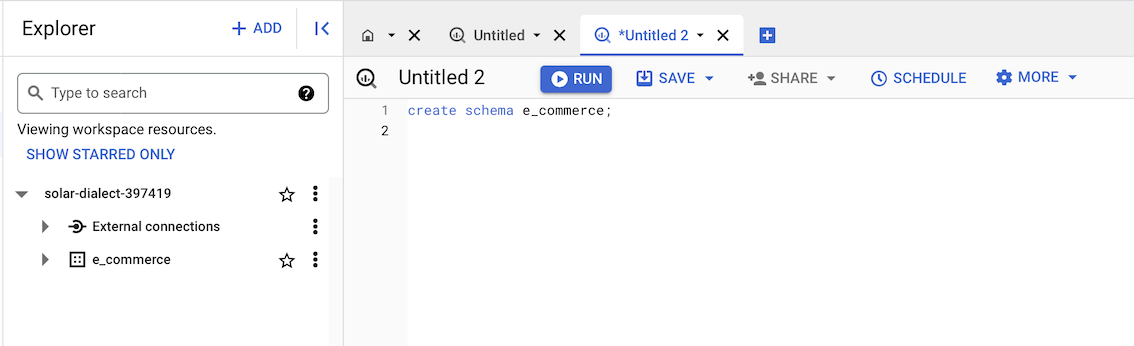

b).Antes de 'submit a job', você deve verificar as permissões para acessar o bucket do GCS. Você pode adicionar novas 'roles: Storage Object Creator, Storage Object Viewer' no 'IAM'

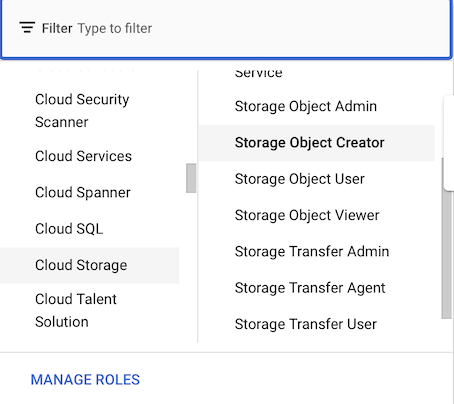

c).Submit Jobs - O código a seguir serve para 'submit a job' no terminal

In [ ]:
# step1, copiar:
gcloud auth login
# A tela será redirecionada para a sua conta de email do Google. Escolha uma conta e depois clique em 'Allow'

# step2, copiar:
gcloud config set project [seu projeto ID]

# step3, copiar:
# Se seu python script esta no bucket, o cominho de submit pyspark deveria ser: gs://...
gcloud dataproc jobs \
submit pyspark /path/to/file/ETL_file_name.py \
--cluster=seu-cluster-name \
--region southamerica-east1 \
--jars=gs://spark-lib/bigquery/spark-bigquery-with-dependencies_2.12-0.26.0.jar


Verifique no Dataproc Jobs

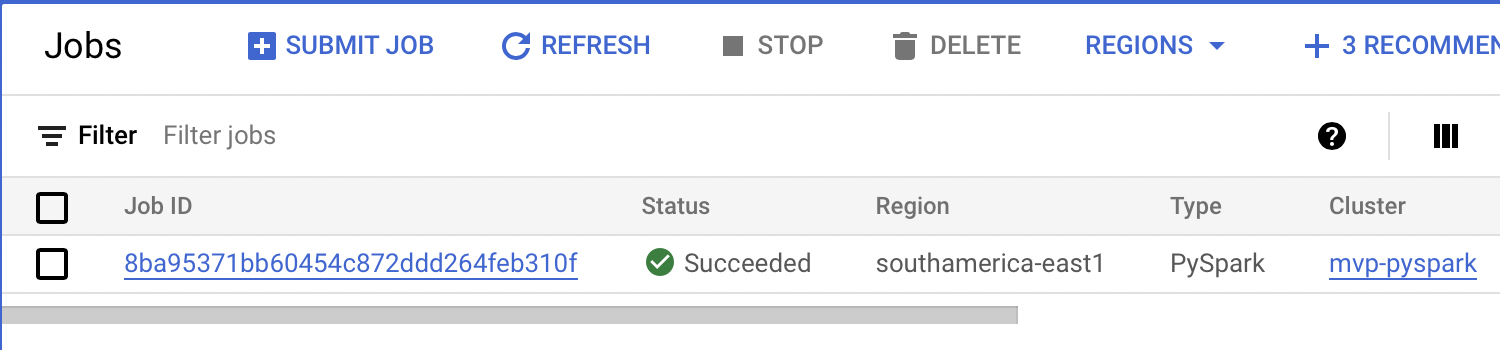

Resultado no BigQuery

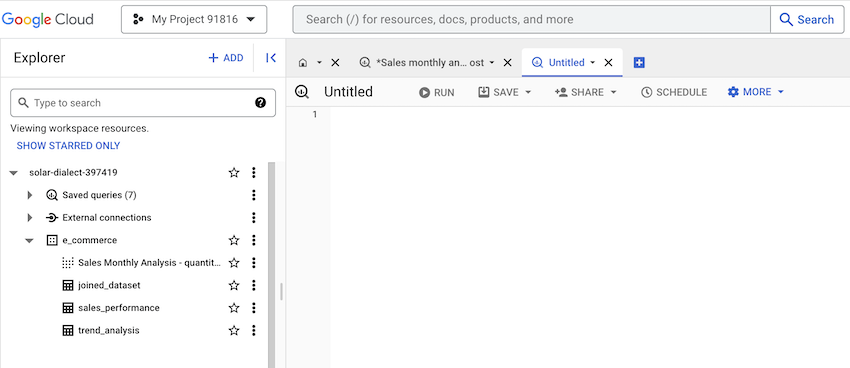

###3. Criacao de Workflow Template - Inserir Job no Dataproc Wrokflow

Criar um workflow template:

* Faça o upload do ETL_pipeline_final.py para o GCS bucket
* Acesse Dataproc->workflows-> clique em 'create workflow templates'
* Insira um nome para o Template ID
* Vá para 'Choose cluster'->selecione 'add managed cluster'->o sistema entrará em 'Configure a cluster' (esse cluster será temporário e será deletado automaticamente pelo sistema após executar o agendamento)
* Após configurar o cluster, vá para 'add jobs'->clique em 'add a job'
* No campo 'Job type', selecione 'PySpark' (aqui não será necessário alterar o Job ID)
* No campo 'Main python file': cole a URL do GCS do script Python e clique em 'Add'
* No campo 'Define dependencies': se tiver apenas um job, não é necessário criar.
* Clique em 'Create'-> um template de workflow foi criado com sucesso.
* Na linha do template criado, clique em 'run', e o seu workflow será ativado
* Retorne à tela do workflow, status: running




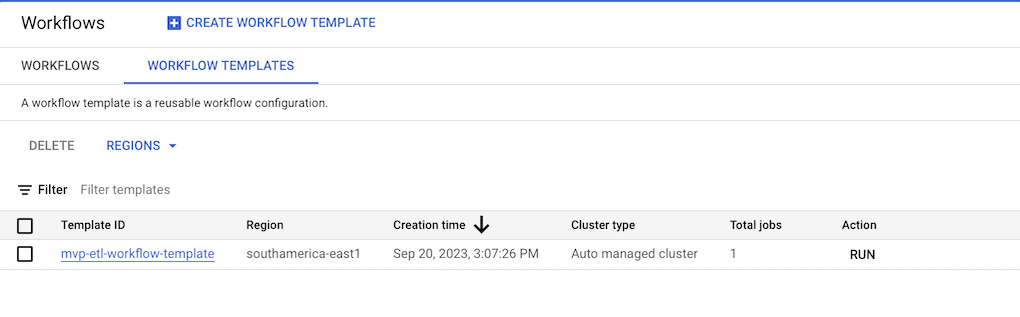

###4. Criacao de Cloud Scheduler para automatizar execucao de workflow

Step1: criar um Role

* Entre 'IAM & Admin' -> clique 'Roels' -> clique '+CREATE ROLE'
* Title: de um nome -> clique 'ADD Permissions'
* Clique 'Filter' -> selectione 'permission' -> em [permissão:] insira no campo em branco informacao: 'dataproc.workflowTemplates.instantiate'
* Marque a caixinha antes de 'dataproc.workflow...' e clique '+ADD Permissions' novamente -> clique 'Filter' e insera 'iam.serviceAccounts.actAs' e marque ele. Agora irá aparecer que você tem duas permissões
* Clique 'CFDATE', a tela exibirá o role que você acabou de criar (nome de Title)

Step2: criar um Service Account

* Entre 'IAM & Admin' -> clique 'Service Accounts' -> clique '+Create Service Sccount' -> entrara 'Service account detail'
* Clique 'Create and Continue' -> em 'Select a role' que fica em 'Grant this service account access to project' selecione 'Custom' -> aparece o nome de role criado no step1 e clique nele -> clique 'Continue'
* Procure 'service account admins role' que fica em 'Grant users access to this service account' e insera seu e-mail address -> clique 'DONE'

Step3: Cloud Scheduler

* Procure 'Cloud Scheduler' no browser
* Clique 'Schedule A Job' -> ira entrar 'Define the schedule'
* Informe para  esses campos:
  * 'Name:'
  * 'Frequence:'-> por exemplo: '09**1' significa as 09:00 am toda segunda-feira
  * 'Time zone:'
* Clique 'Continue' e procure 'Configure the execution'
* Em 'Targe type' selecione 'HTTP' e informe para esses campos:
  * 'URL:' insera informacao: 'https://dataproc.googleapis.com/v1/projects/{project-id}/regions/us-central1/workflowTemplates/{template-name}:instantiate?alt=json'
  * 'HTTP method:' selectione 'POST'
  * 'HTTP headers': Name1: User-Agent, Value1: Google-Cloud-Schedule', Name2: key, Value2: test (esse campo sao key-value pair, name2 e value2 pode informar qualquer informacao)
  * 'Auth header:' selecione 'Add OAuth token'
  * 'Selecte service account:' selecione o qual criado no step2
* Clique 'CREATE' -> a tela voltou para Cloud Scheduler, procure 'Actions' e clique 'Force run'
* Volte para Dataproc -> Cluster -> uma criacao de cluster ativado e em estado de implantação, cujo status: 'Provisioning'

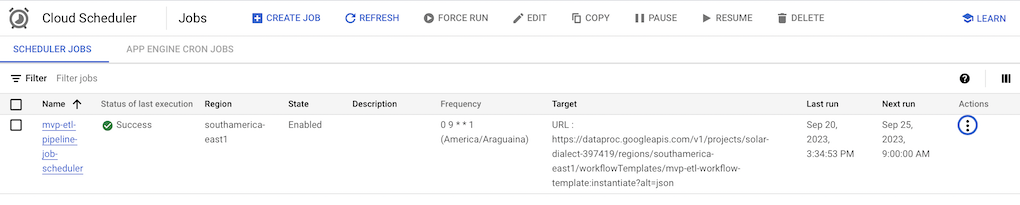

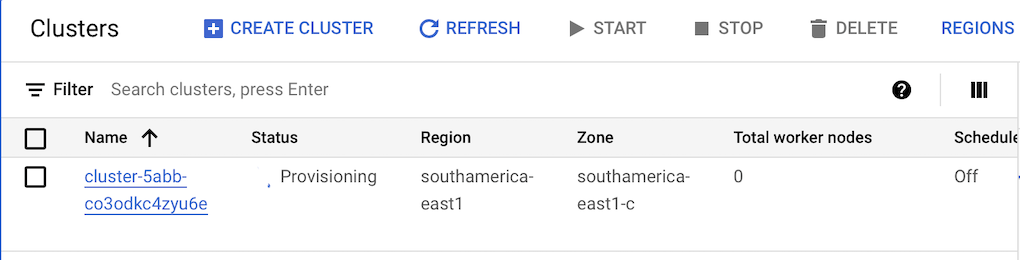

##Método 2: Desenvolva o ETL pipeline usando Cloud Dataprep e ative o agendamento (Schedule)

### Implementar ETL pipeline em Dataprep

Entrar Cloud Dataprep

* Clique 'Create Flow' -> insera um nome no compo de 'Flow Name' -> clique 'Create'

Extract datas:
* Clique 'Add Datasets' -> a tela show arquivo em GCS bucket, caso sua data esteja em maquina local, clique 'Import Datasets' -> clique 'Choose a file' (aceitou multi arquivos) -> clique 'Import & Add to Flow'
* Entrar na interface gráfica, os arquivos selecionados serão exibidos como blocos de histograma. Clique à direita de cada bloco para criar uma 'Recipe' para cada arquivo

Transformation:
* Clique 'Edit Recipe', aqui voce vai fazer tudo transformacao necessaria para  seus dados.
  * Aqui você pode fazer a limpeza de dados diretamente em cada coluna, preenchendo valores ausentes, entre outros.
  * Dicas: clique 'New Step', aqui pode achar multi funcao necessario para transformacao de dados
  * Por exemplo: 'Join Datasets', clique nele e aparecerar uma tela  para voce selecionar arquivos que sao em formato de 'recipe' para join

Load:
* Clique em 'Create Output to Run' à direita do último bloco de 'recipe' -> clique 'Run Job'
* Clique 'Manual setting'->'Publishing action' irar subir output para GCS buckt e BigQuery, do BigQuery (clique create new table) pode selectionar 'Drop the table every run', do bucket pode selecionar 'Replace the file every run'

Schedule:
* Clique 'Schedule' -> ira implemantar um agendamento e depois irar repetir o processo de 'Load'

Resultado:
Uma talea 'joined_dataset' foi implemantada no BigQuqery

----------------------------------------------------------------

* Transformation:
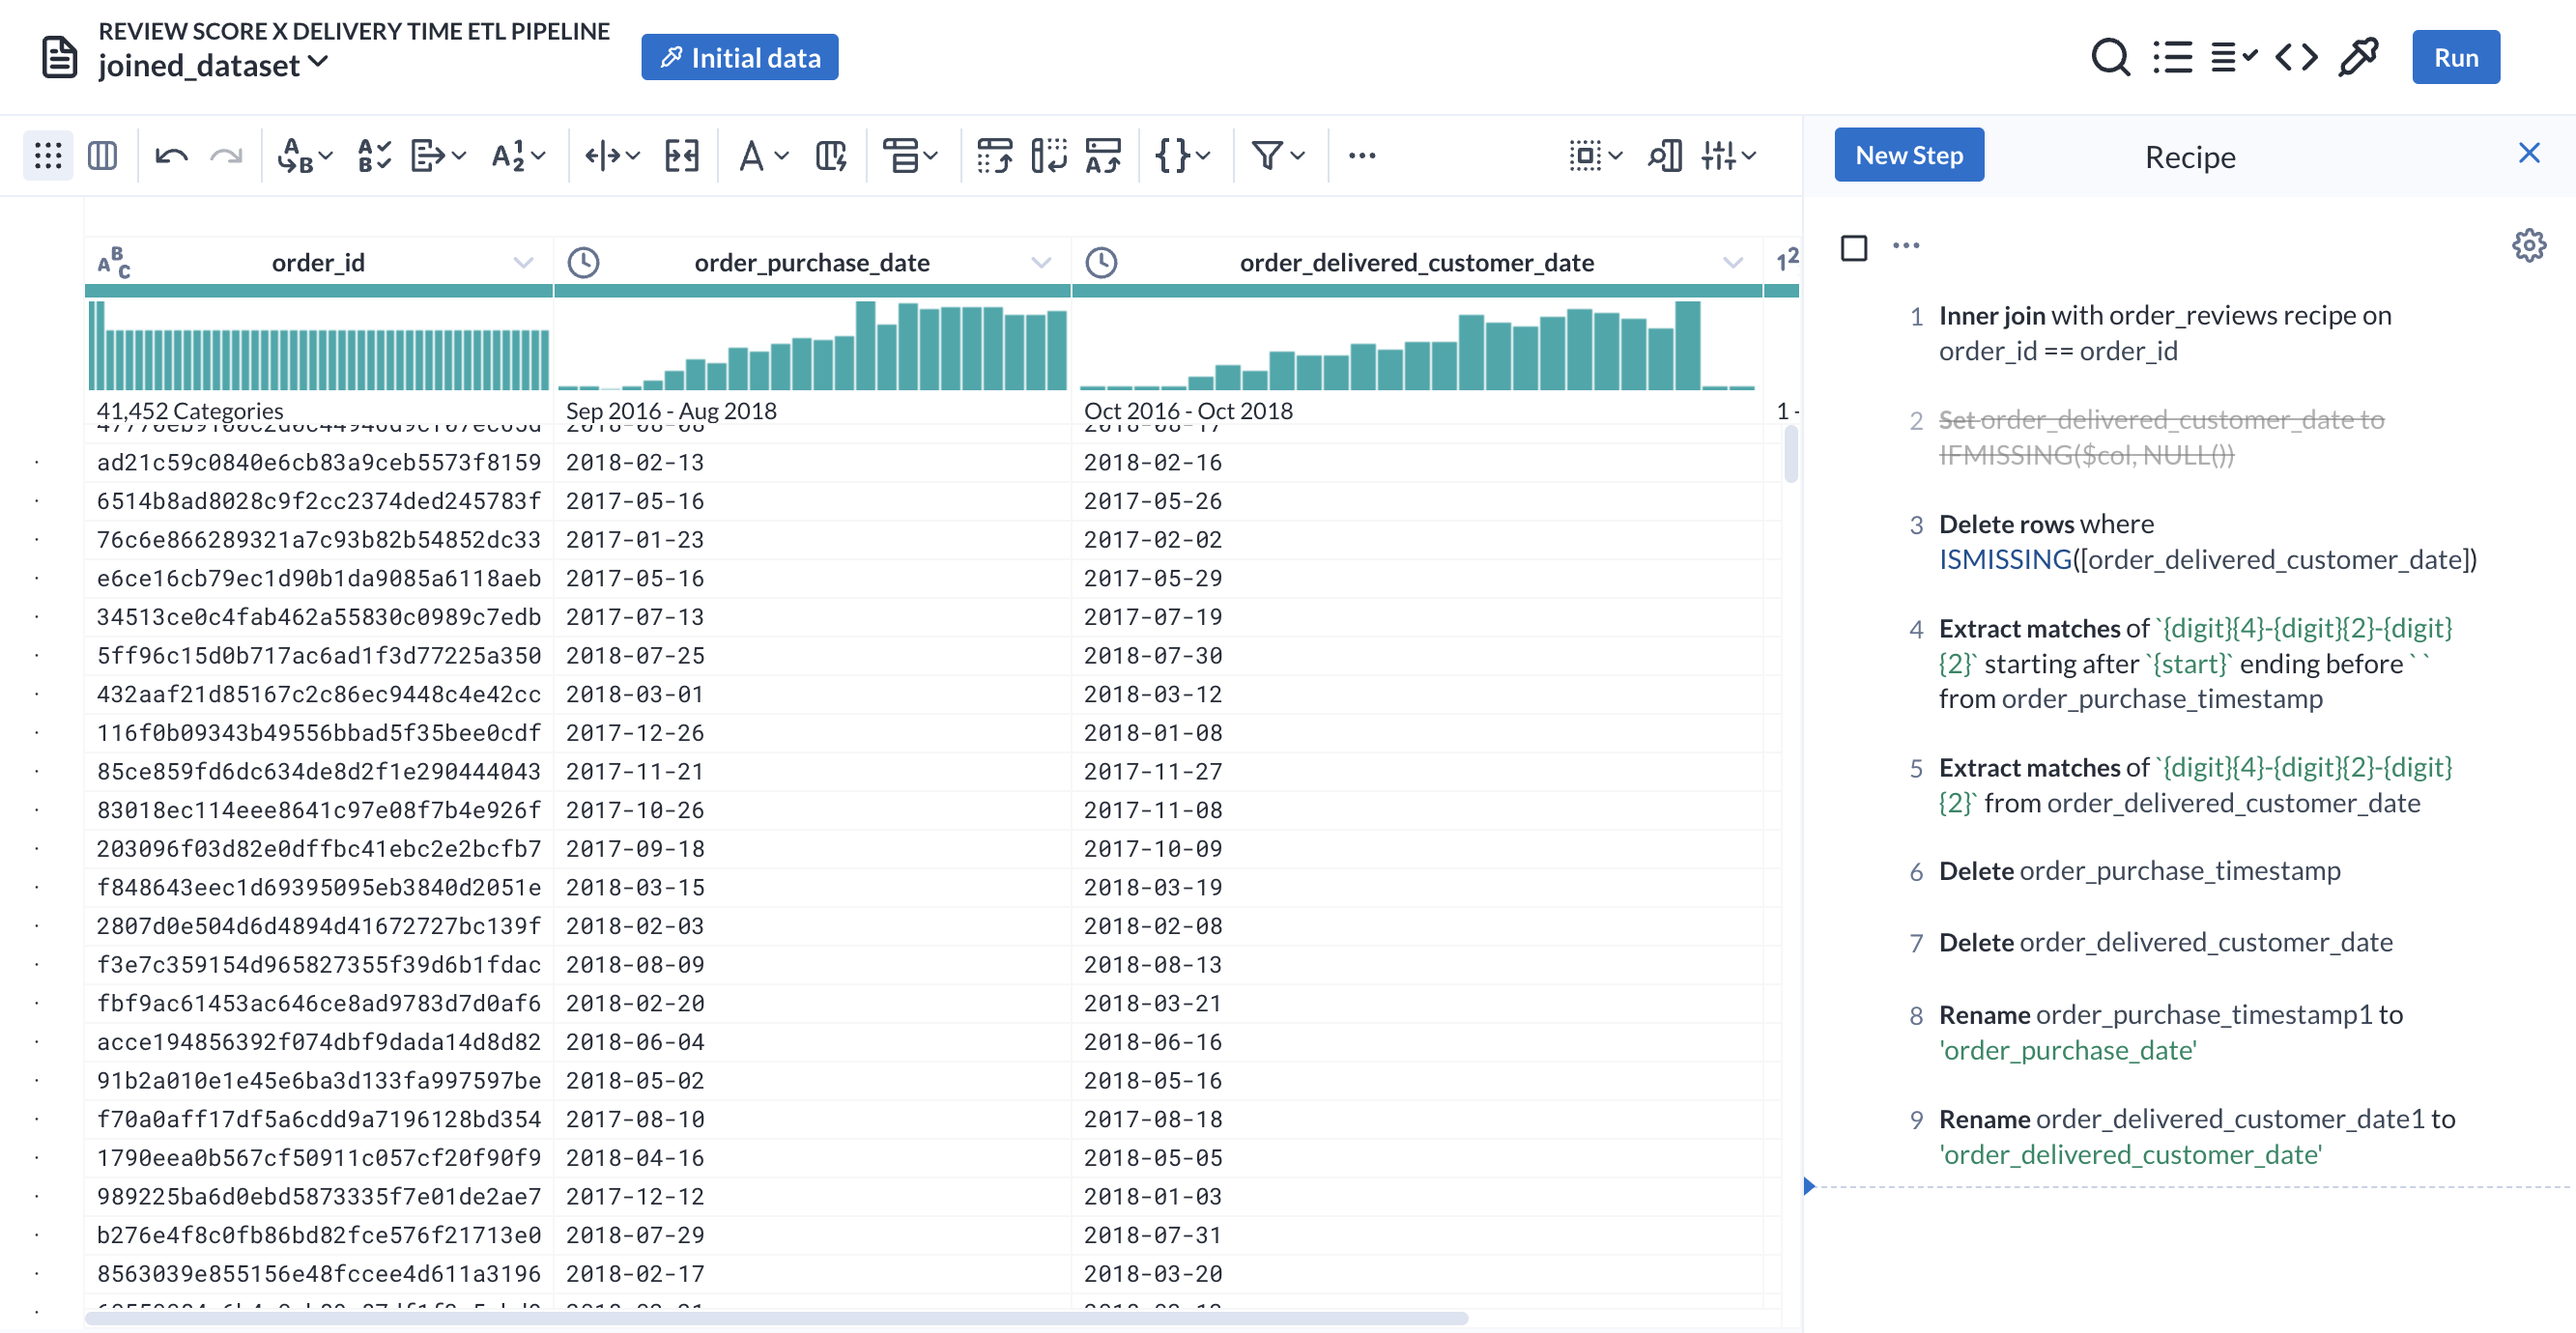

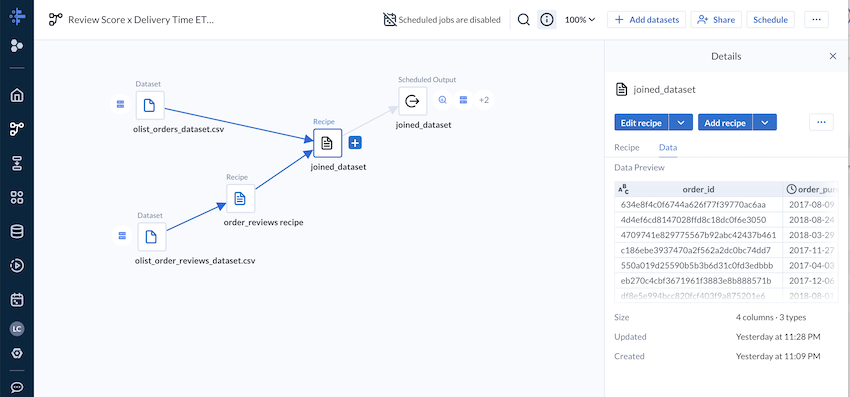

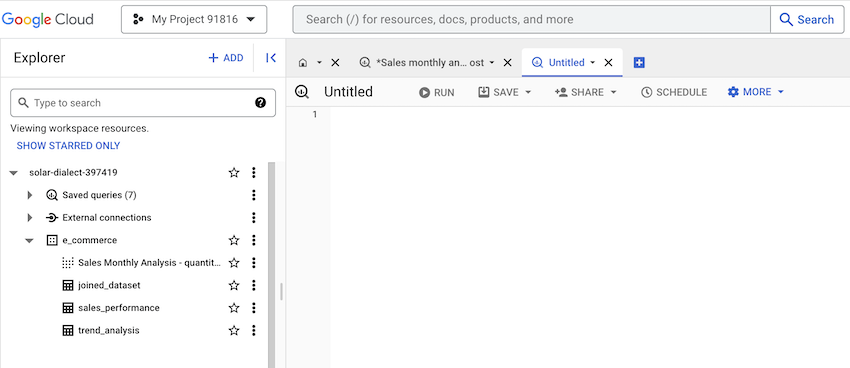

#**Data Quality aplicado**

Entre Dataplex -> clique 'Data Quality' -> clique 'CREATE DATA QUALITY SCAN' para implementar reglas

Ao criar as regras, clique em 'Run Data Quality Scan'. Em seguida, acesse a tabela correspondente tanto no Dataplex quanto no BigQuery e clique na opção 'DATA QUALITY'. A interface deverá aparecer conforme mostrado abaixo (aqui so mostrar um dos rerultados).

Devido à falta de desduplicação de order_id na transformação do sales_performance no script Python ETL, erros foram identificados durante a verificação da qualidade dos dados. Como a tabela já está no BigQuery, a correção deve ser feita lá.

O resultado de Data Quality da tabela 'sales_permance' no Dataplex:

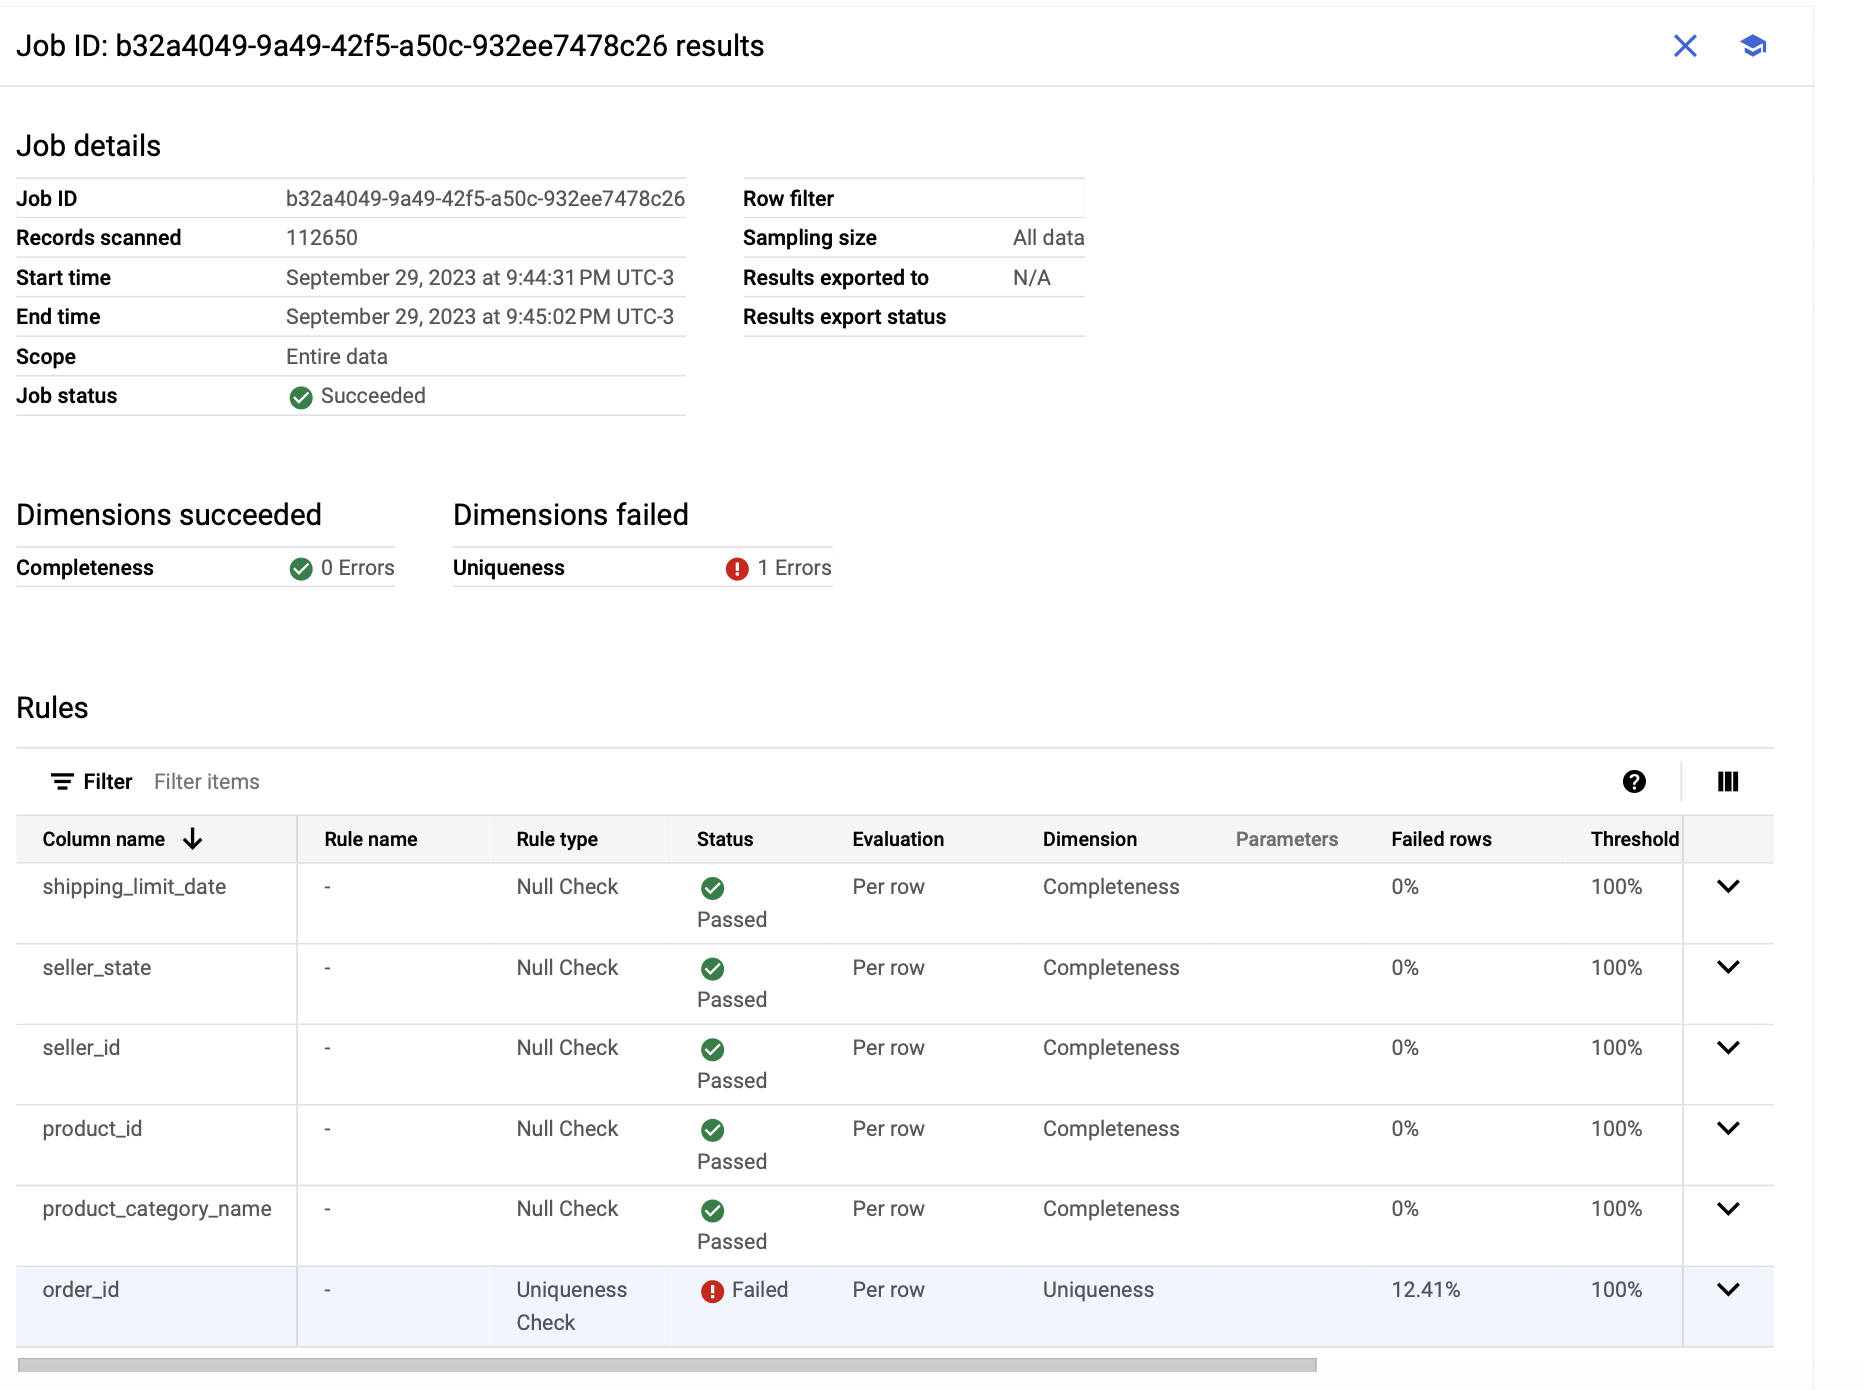

**Para resolver o problema de duplicação, a limpeza de dados é realizada no BigQuery**

In [ ]:
CREATE OR REPLACE TABLE solar-dialect-397419.e_commerce.sales_performance AS
SELECT *
FROM (
  SELECT *,
         ROW_NUMBER() OVER (PARTITION BY order_id ORDER BY TIMESTAMP(shipping_limit_date) DESC) AS rn
  FROM solar-dialect-397419.e_commerce.sales_performance
)
WHERE rn = 1;

**O status após o tratamento mostra 'Passed'**

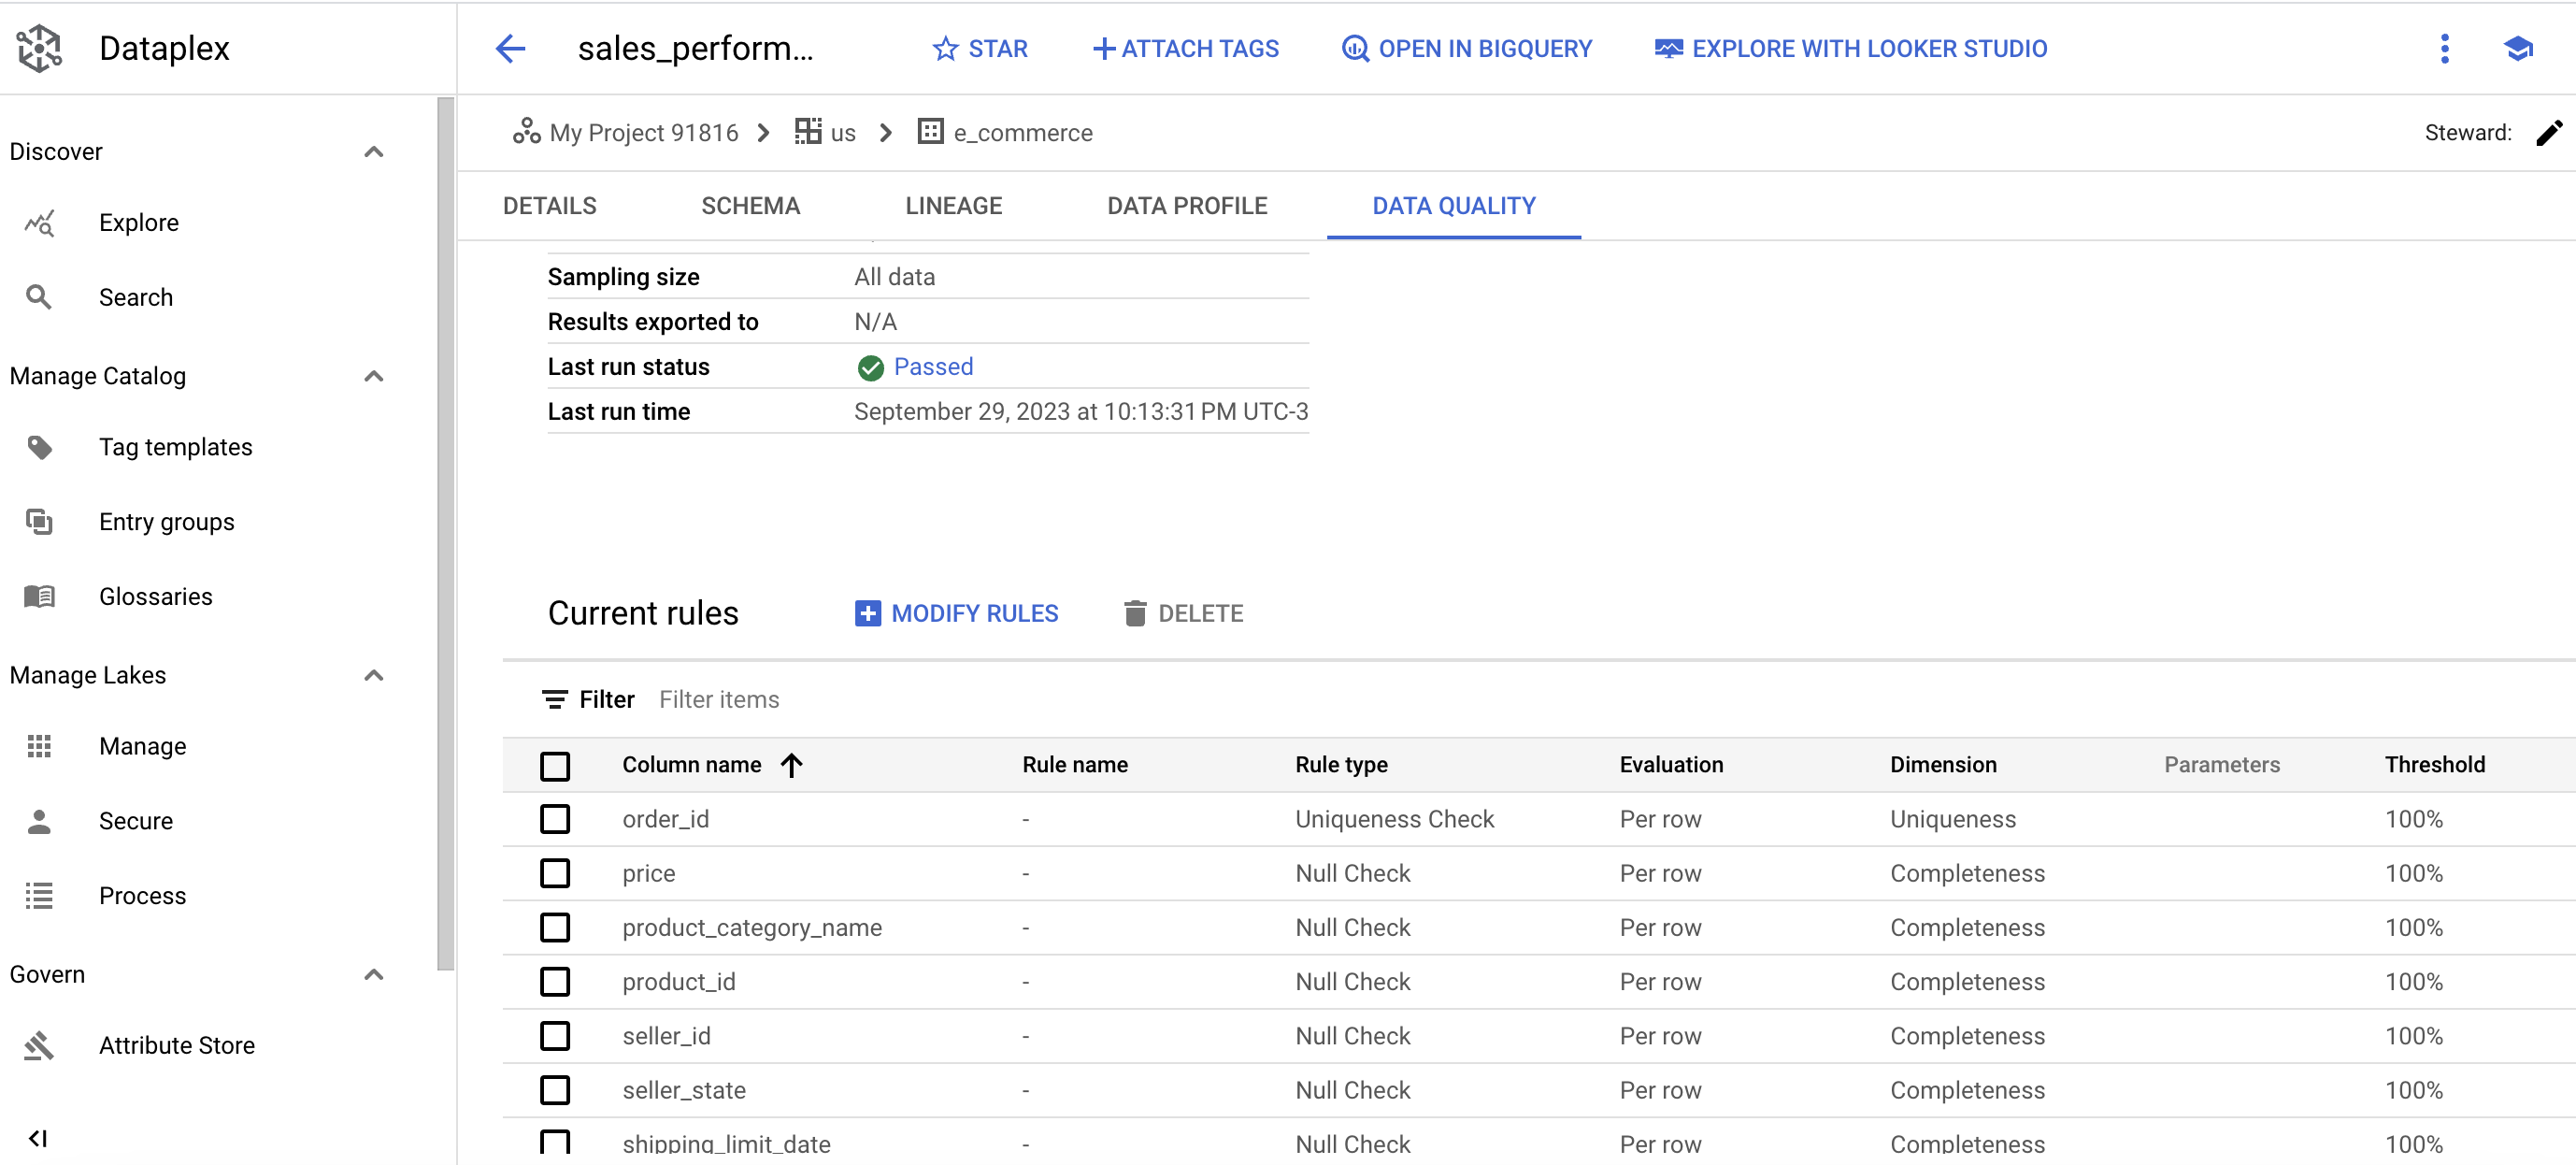

Verificação de Unicidade (Uniqueness Check): A verificação de unicidade para 'order_id' é de 100%, o que significa que esses campos são únicos e não possuem valores duplicados.
Verificação de Nulidade (Null Check): A verificação de completude para campos como 'product_id', 'price', 'product_category_name', 'seller_state' e 'shipping_limit_date' também é de 100%, o que indica que esses campos não contêm valores NULL.

# **Deploy Data Catalog**

Step1, tableas no BigQuery:
* Entre Data Catalog (Dataplex) -> clique 'Tag templetes' -> clique 'CREATE TAG TEMPLETE'
* Informe 'Templete name' e 'Location'
* Comece construcao do seu catalog em campo de 'Fields'
* Apos de criacao de catalog, clique 'Search', selecione tabela para implemantar catalogo -> clique 'ATTACH TAGS' -> selecione um Tag Templete criado

Step2, tables or arquivos no GCS bucket:
* Entre Data Catalog (Dataplex) -> clique 'Entry groups' -> clique '+Create Entry Groups'
* Preencha informacao necessaria e clique 'CREATE'
* Aparece uma tela com nome de grupos criado e esta informando 'To apply catalog to gcs files -> clique '+CREATE'
* Em 'Create Fileset', preencha informacao necessario, no campo de 'File Parttens' insera URL de buckets or arquivos que ira implementar catalogo
* Entre serch, ira aparecer bucket do GCS para implementar catalogo usando Tag Templete criado (clique 'ATTACH TAGS')

**Catalog aplicado em tabela de BigQuery (Tags)**

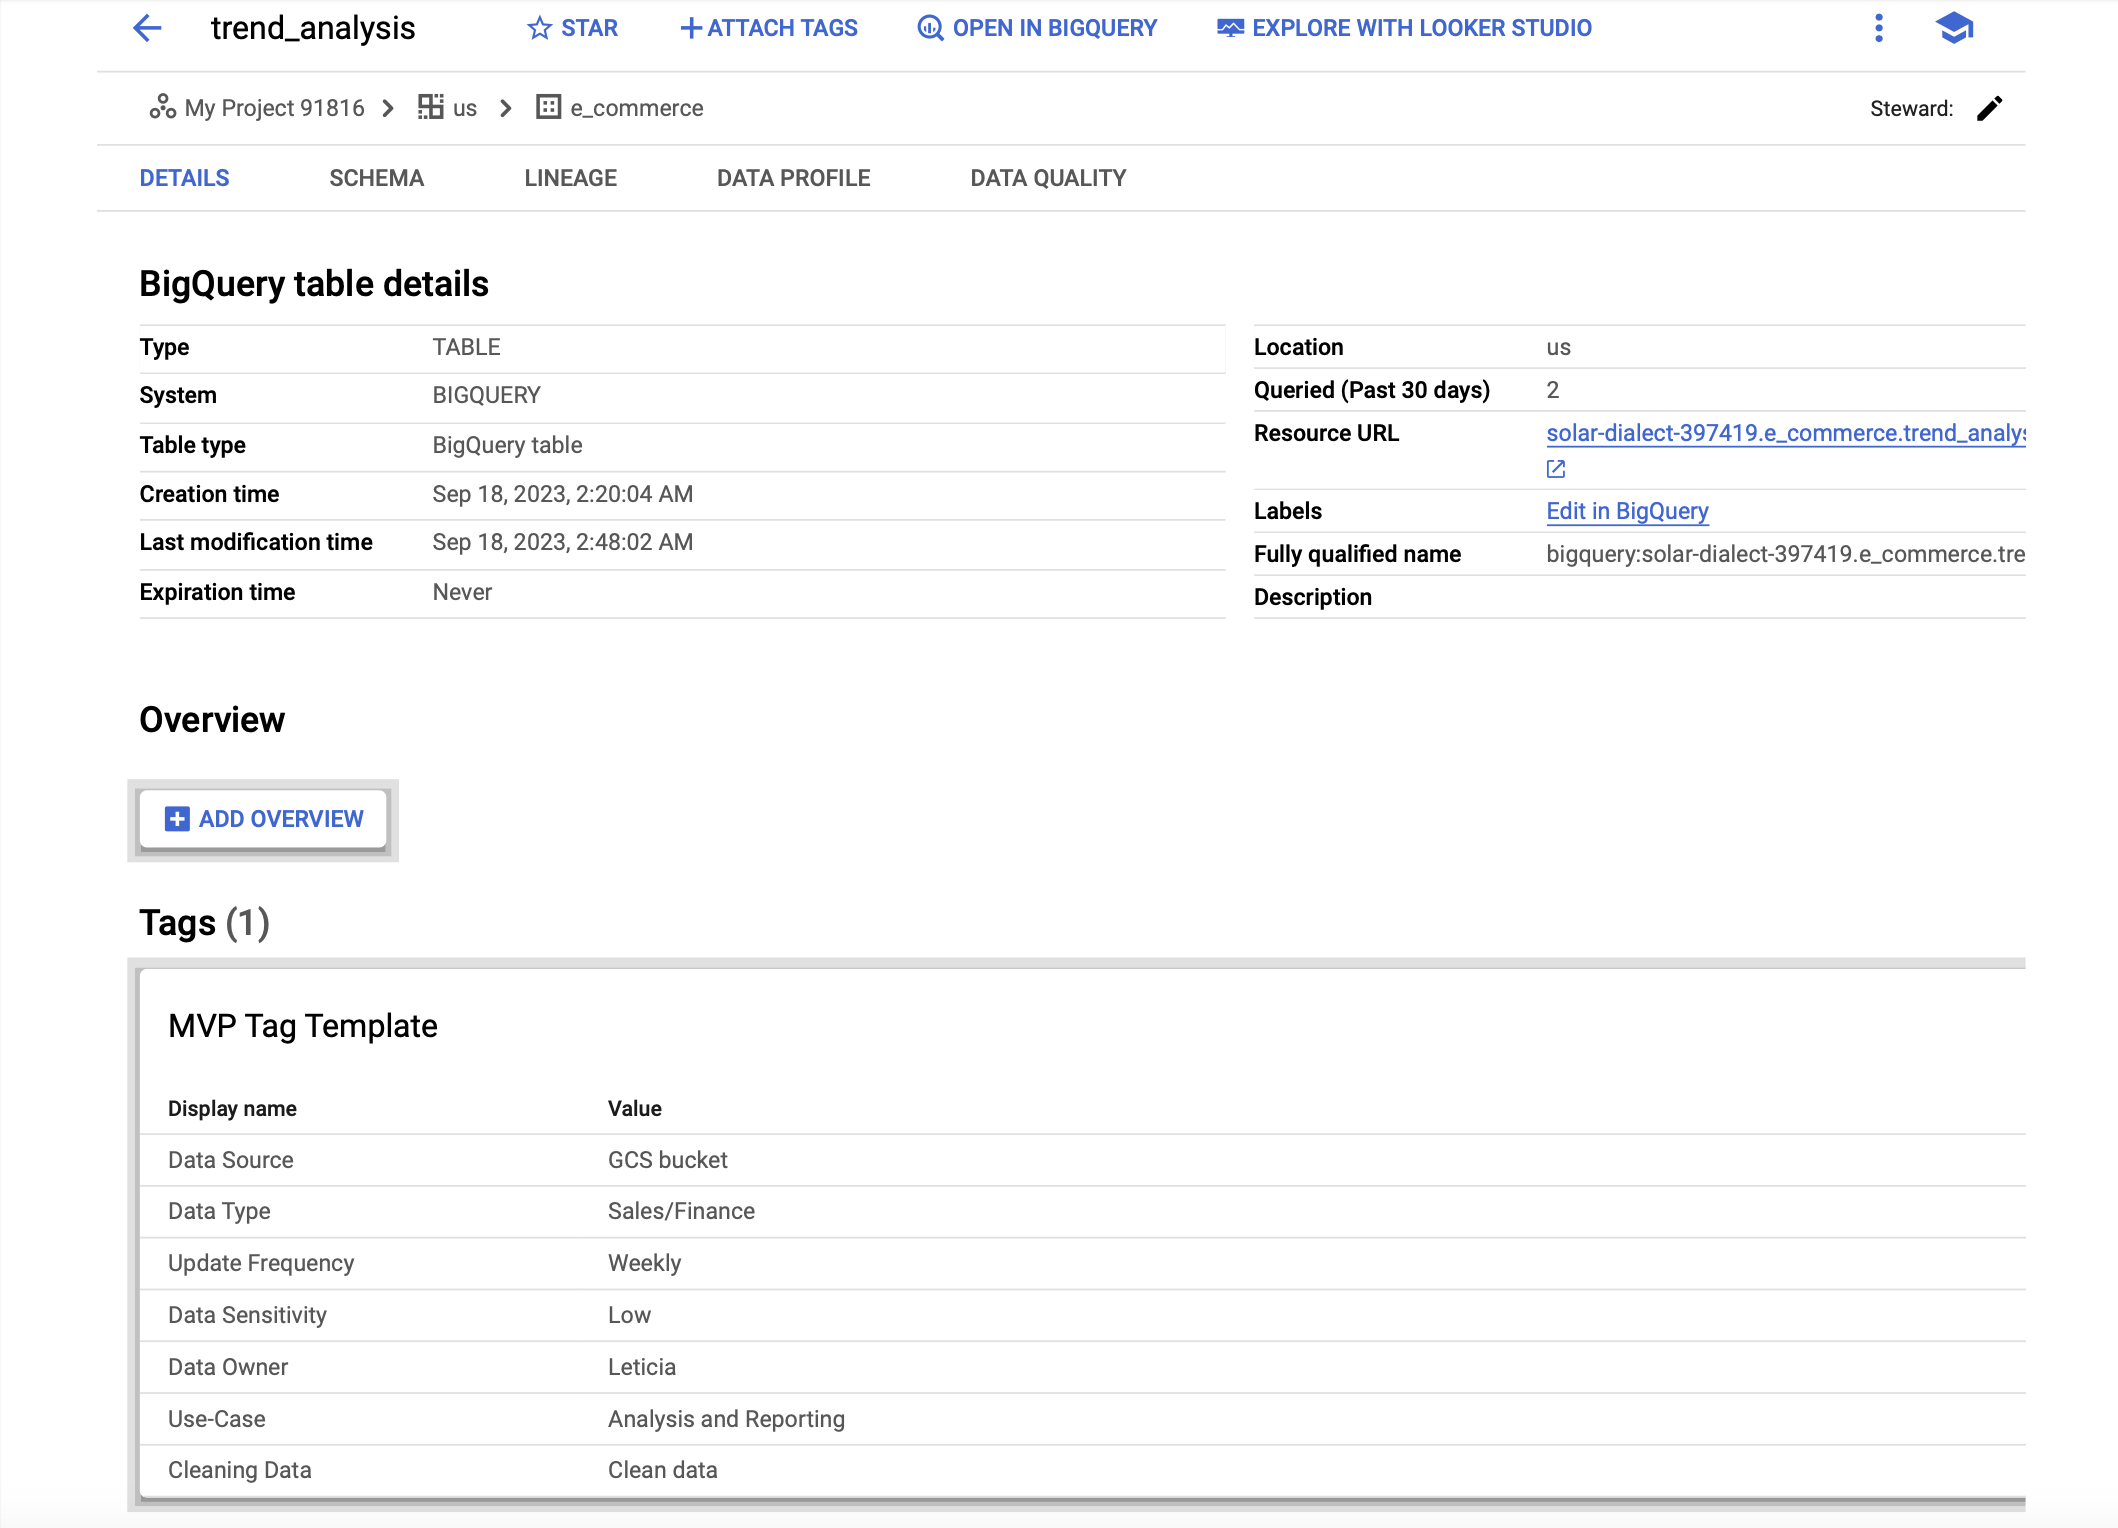

**Catalog aplicado em GCS bucket (Tags)**

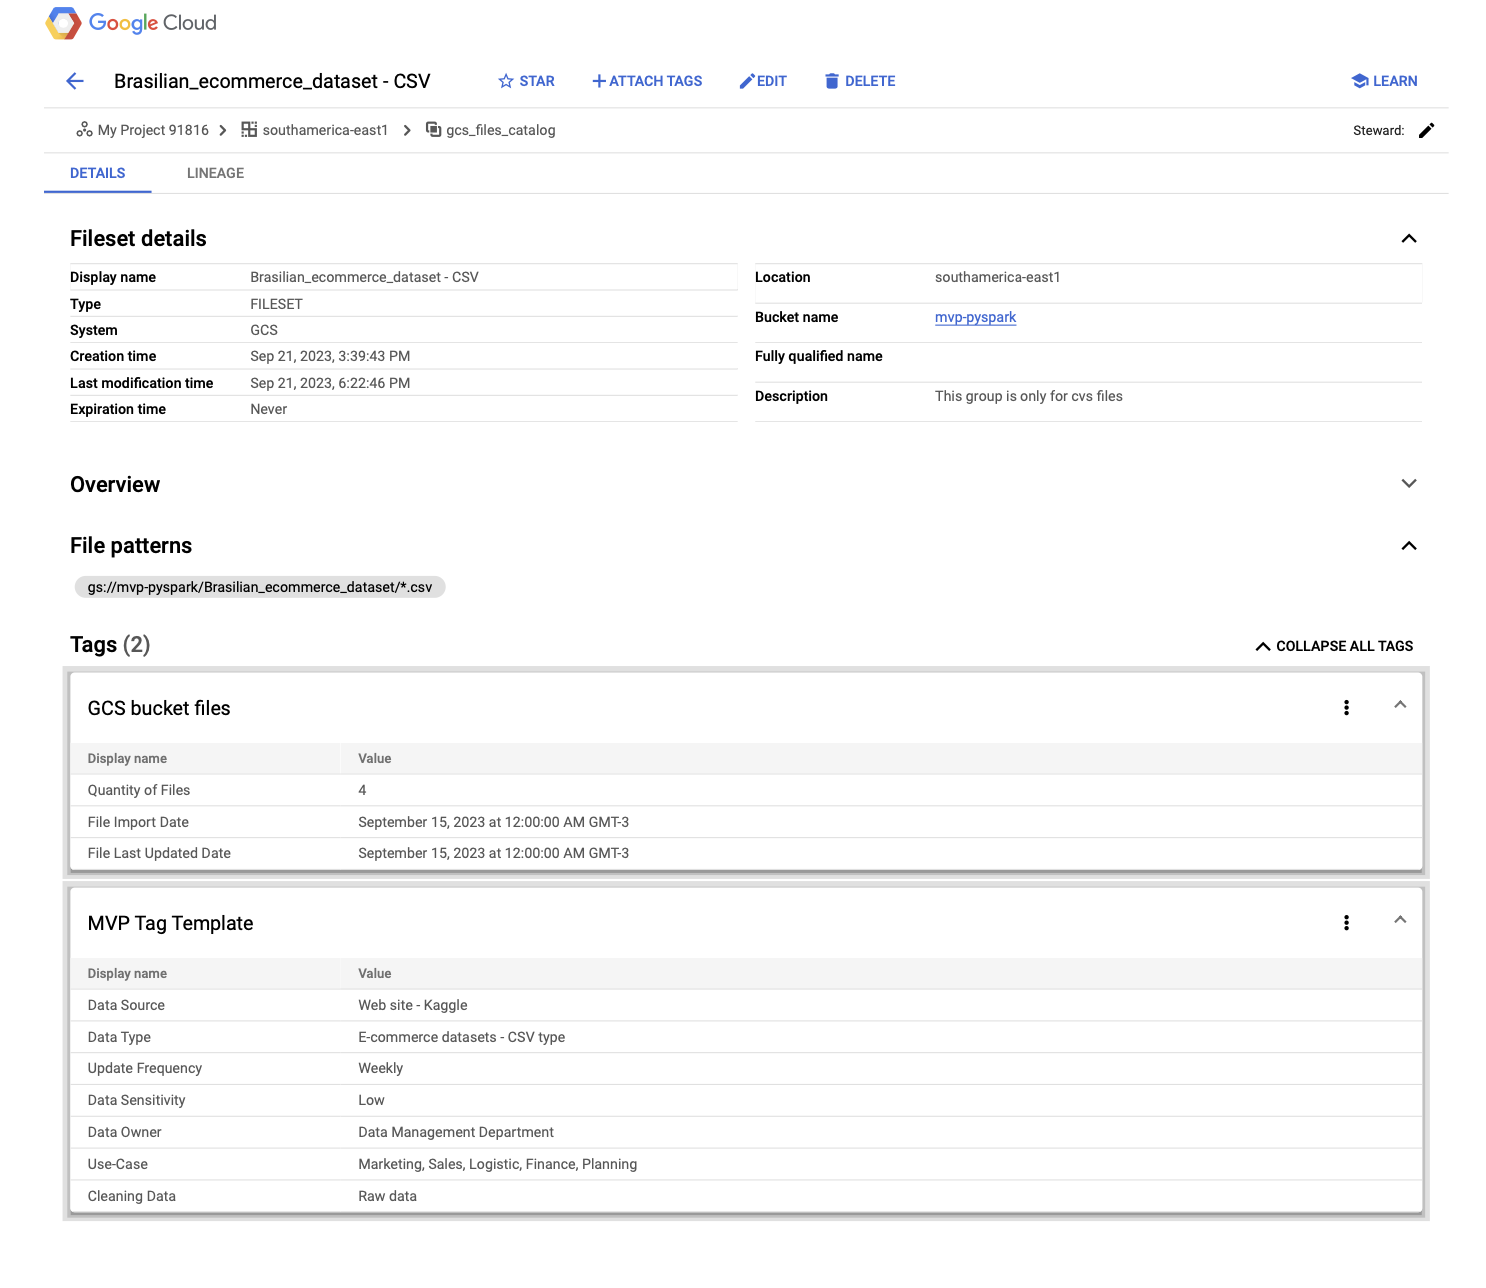

# **Análise de Dados com BigQuery e Visualização com Cloud Studio**

###Para responder às perguntas do projeto, gerei três tabelas principais para analisar os dados, e essas análises serão realizadas no BigQuery e os resultados da análise serão visualizados através do Cloud Studio

## **1st Pergunta: como esta o desempenho de vendas do ano 2018?**

para responder essa pergunta, duas analises foram feita

**Analise 1: Essa análise pode ajudar a entender quais vendedores têm o melhor desempenho de vendas no ano 2018, tanto em termos de volume de pedidos quanto de receita. Isso permitindo assim um gerenciamento de estoque e planejamento de estratégias de vendas mais eficazes**

In [ ]:
# Por volume de pedidos
# sellers_ranking_by_order_by_year
CREATE OR REPLACE TABLE solar-dialect-397419._scriptd4e59ccc8771f6e76dee66499daca94bff9c9ecd.seller_performance AS
SELECT
    seller_id,
    EXTRACT(YEAR FROM shipping_limit_date) AS shipping_year,
    seller_state,
    COUNT(order_id) AS total_orders,
    ROUND(SUM(price), 2) AS total_revenue
FROM solar-dialect-397419.e_commerce.sales_performance
GROUP BY seller_id, shipping_year, seller_state;

SELECT
    seller_id,
    shipping_year,
    seller_state,
    total_orders,
    total_revenue,
    RANK() OVER (PARTITION BY shipping_year ORDER BY total_orders DESC) AS rank
FROM solar-dialect-397419._scriptd4e59ccc8771f6e76dee66499daca94bff9c9ecd.seller_performance
WHERE shipping_year = 2018
ORDER BY shipping_year, rank
LIMIT 50;

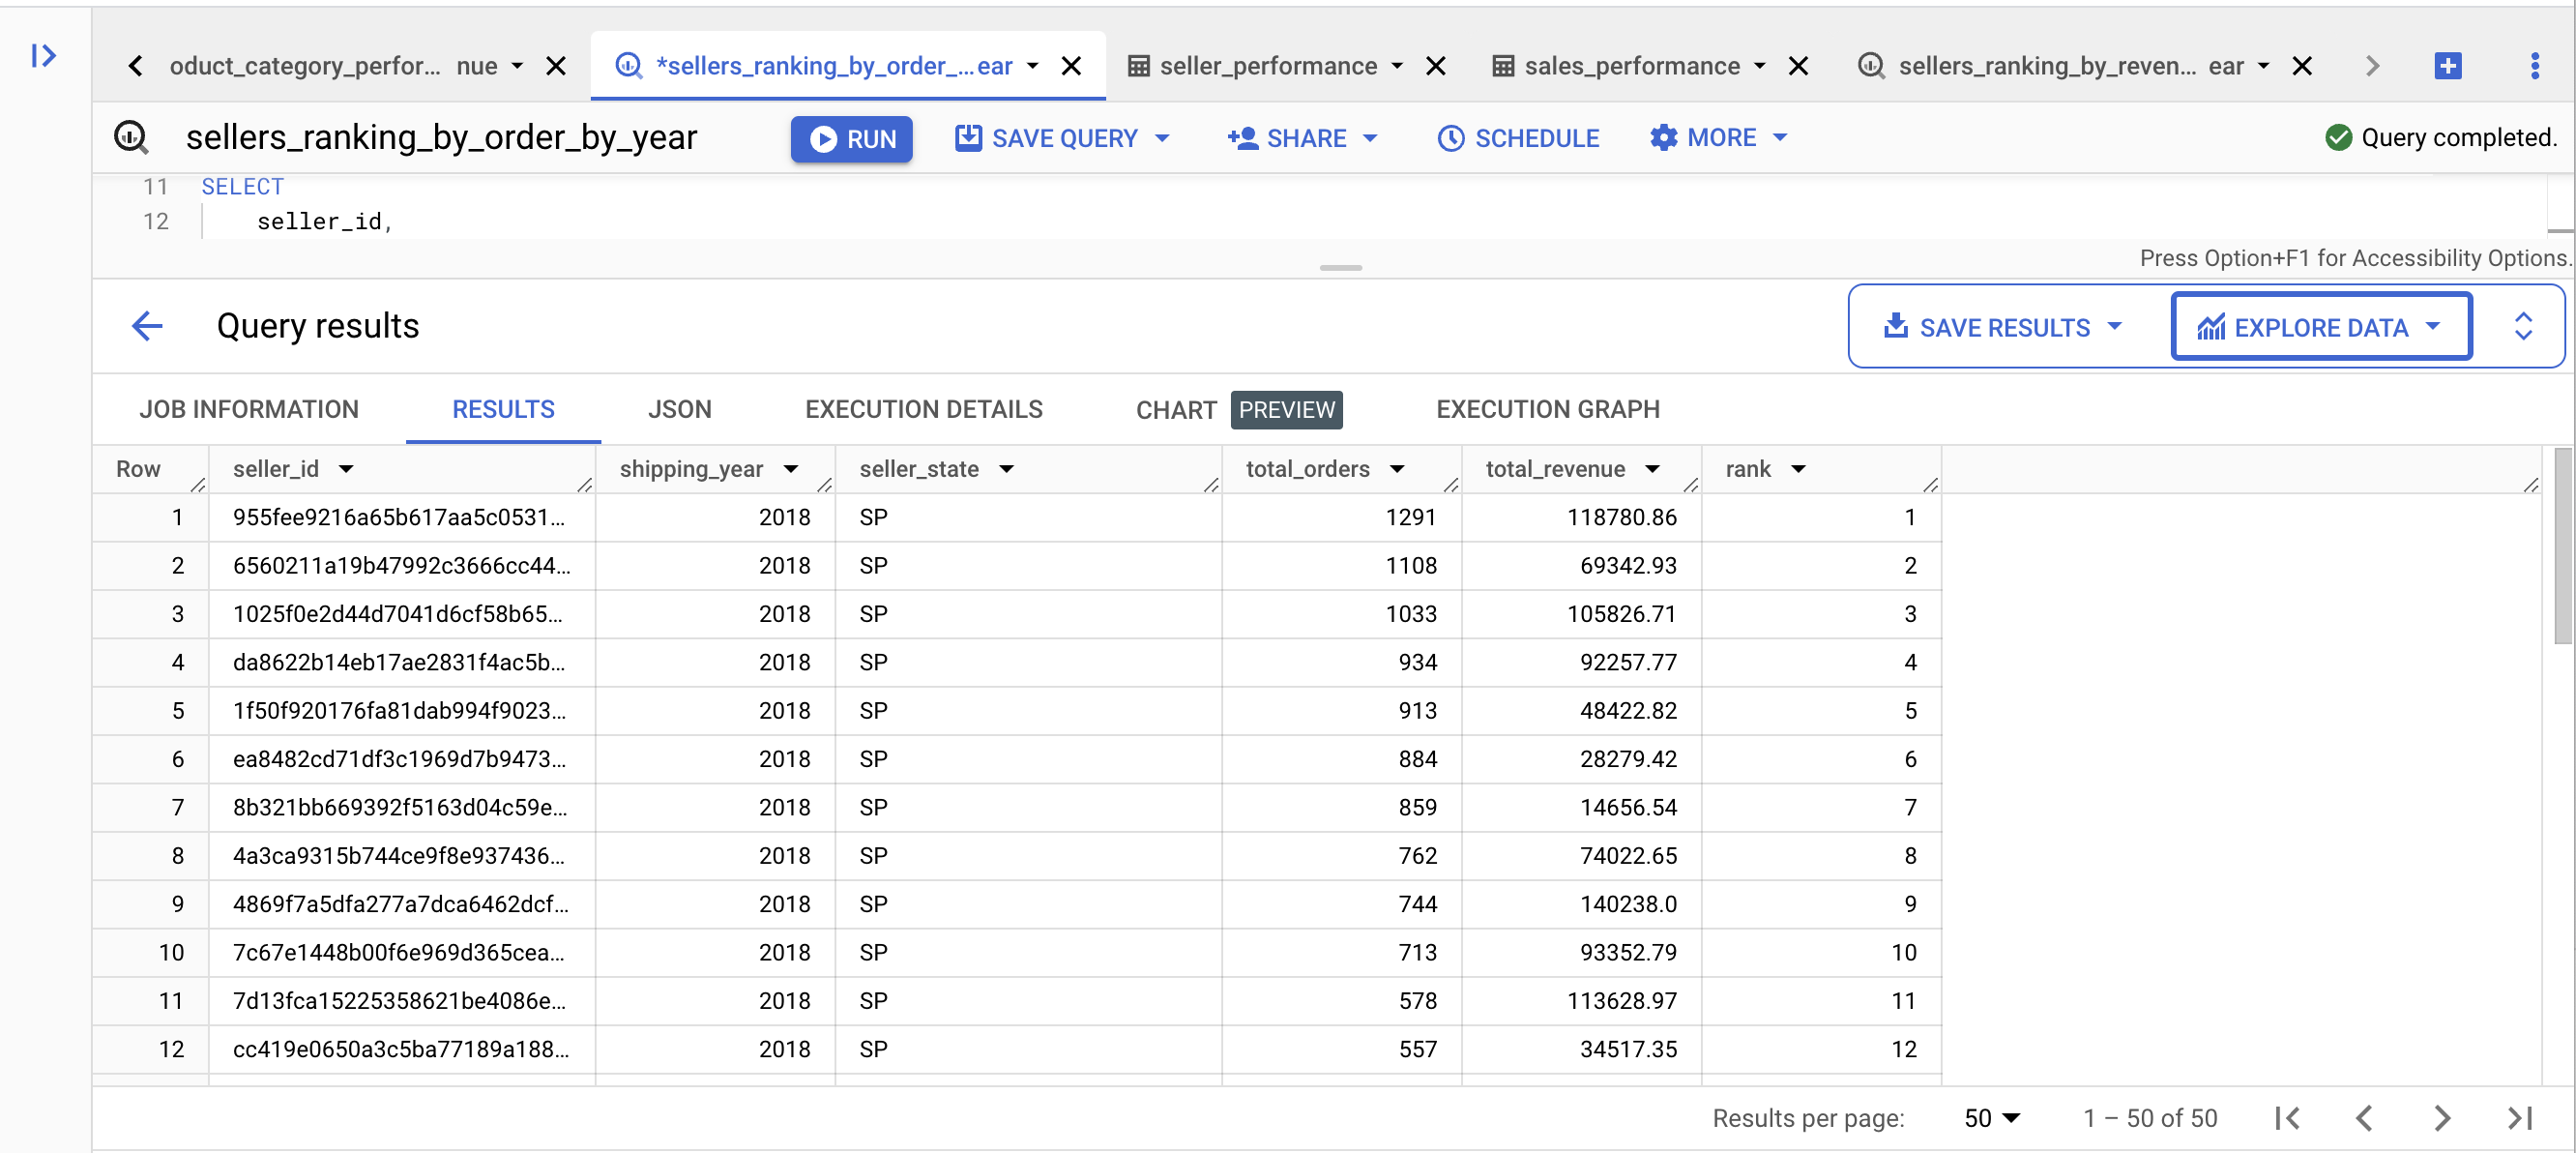

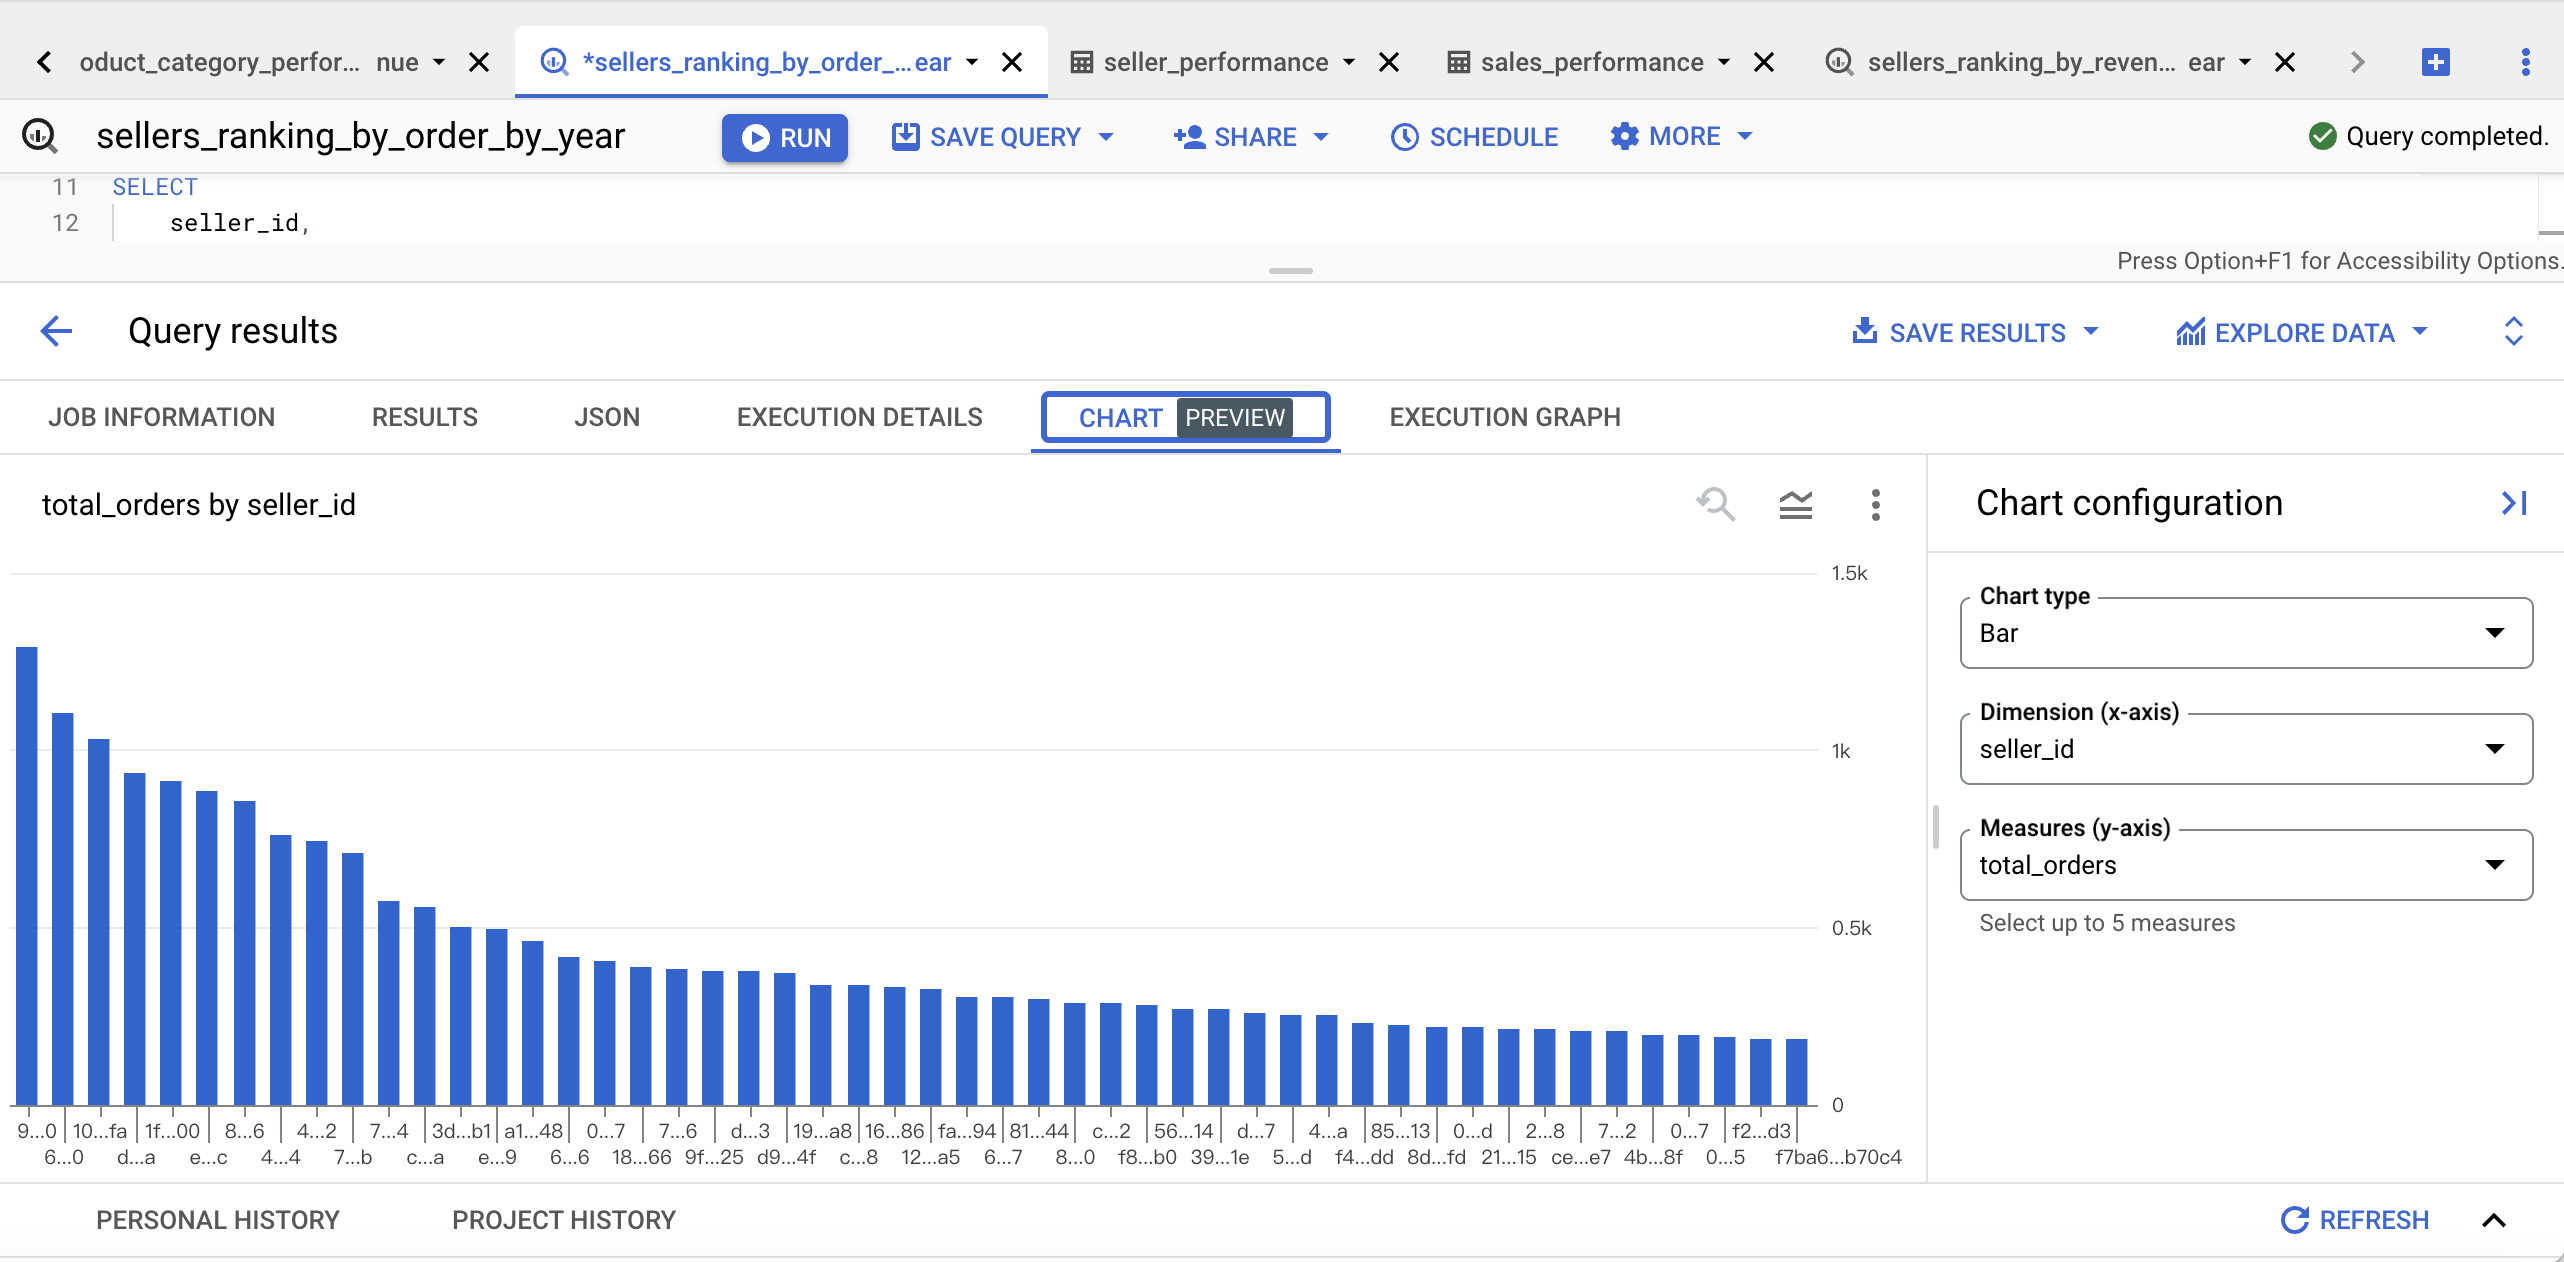

In [ ]:
# Por receitas
# sellers_ranking_by_revenue_by_year

SELECT
    seller_id,
    shipping_year,
    seller_state,
    total_orders,
    total_revenue,
    RANK() OVER (PARTITION BY shipping_year ORDER BY total_revenue DESC) AS rank
FROM solar-dialect-397419._scriptd4e59ccc8771f6e76dee66499daca94bff9c9ecd.seller_performance
WHERE shipping_year = 2018
ORDER BY shipping_year, rank
LIMIT 50;

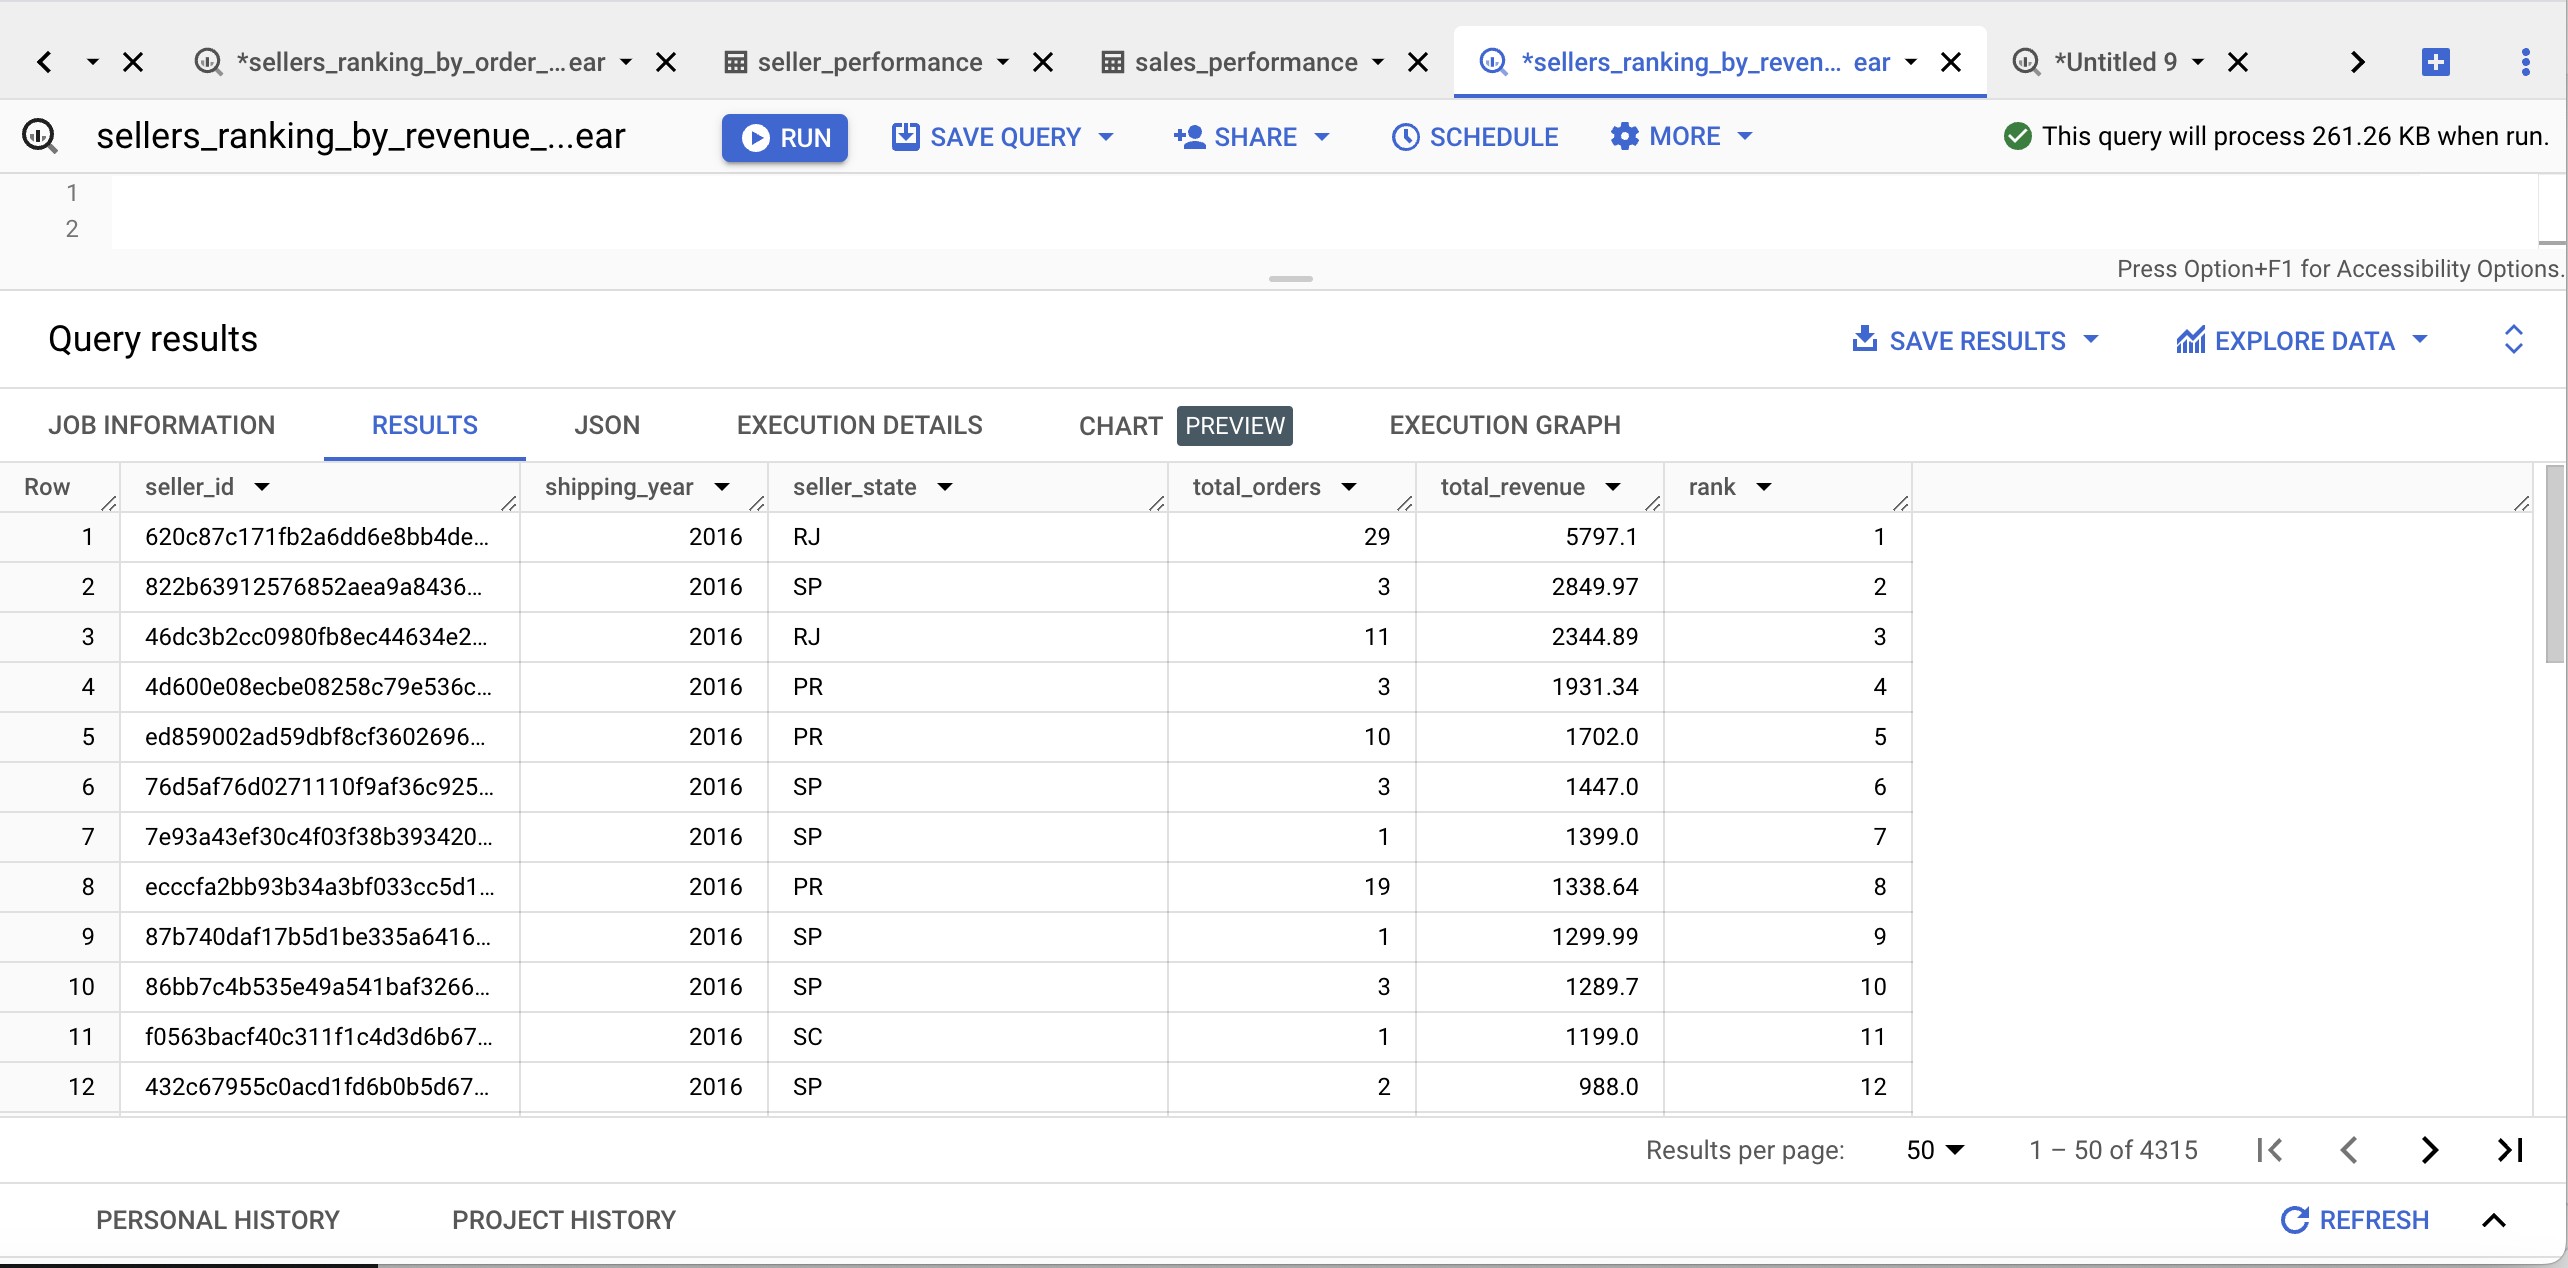

Através do ranking dos top 50 vendedores em termos de receita, podemos observar que alguns vendedores, na verdade, venderam apenas um pedido em 2018, mas ainda assim estão entre os top 50 em receita. Portanto, podemos ajustar a query para descobrir que há um total de 14 vendedores nessa situação.

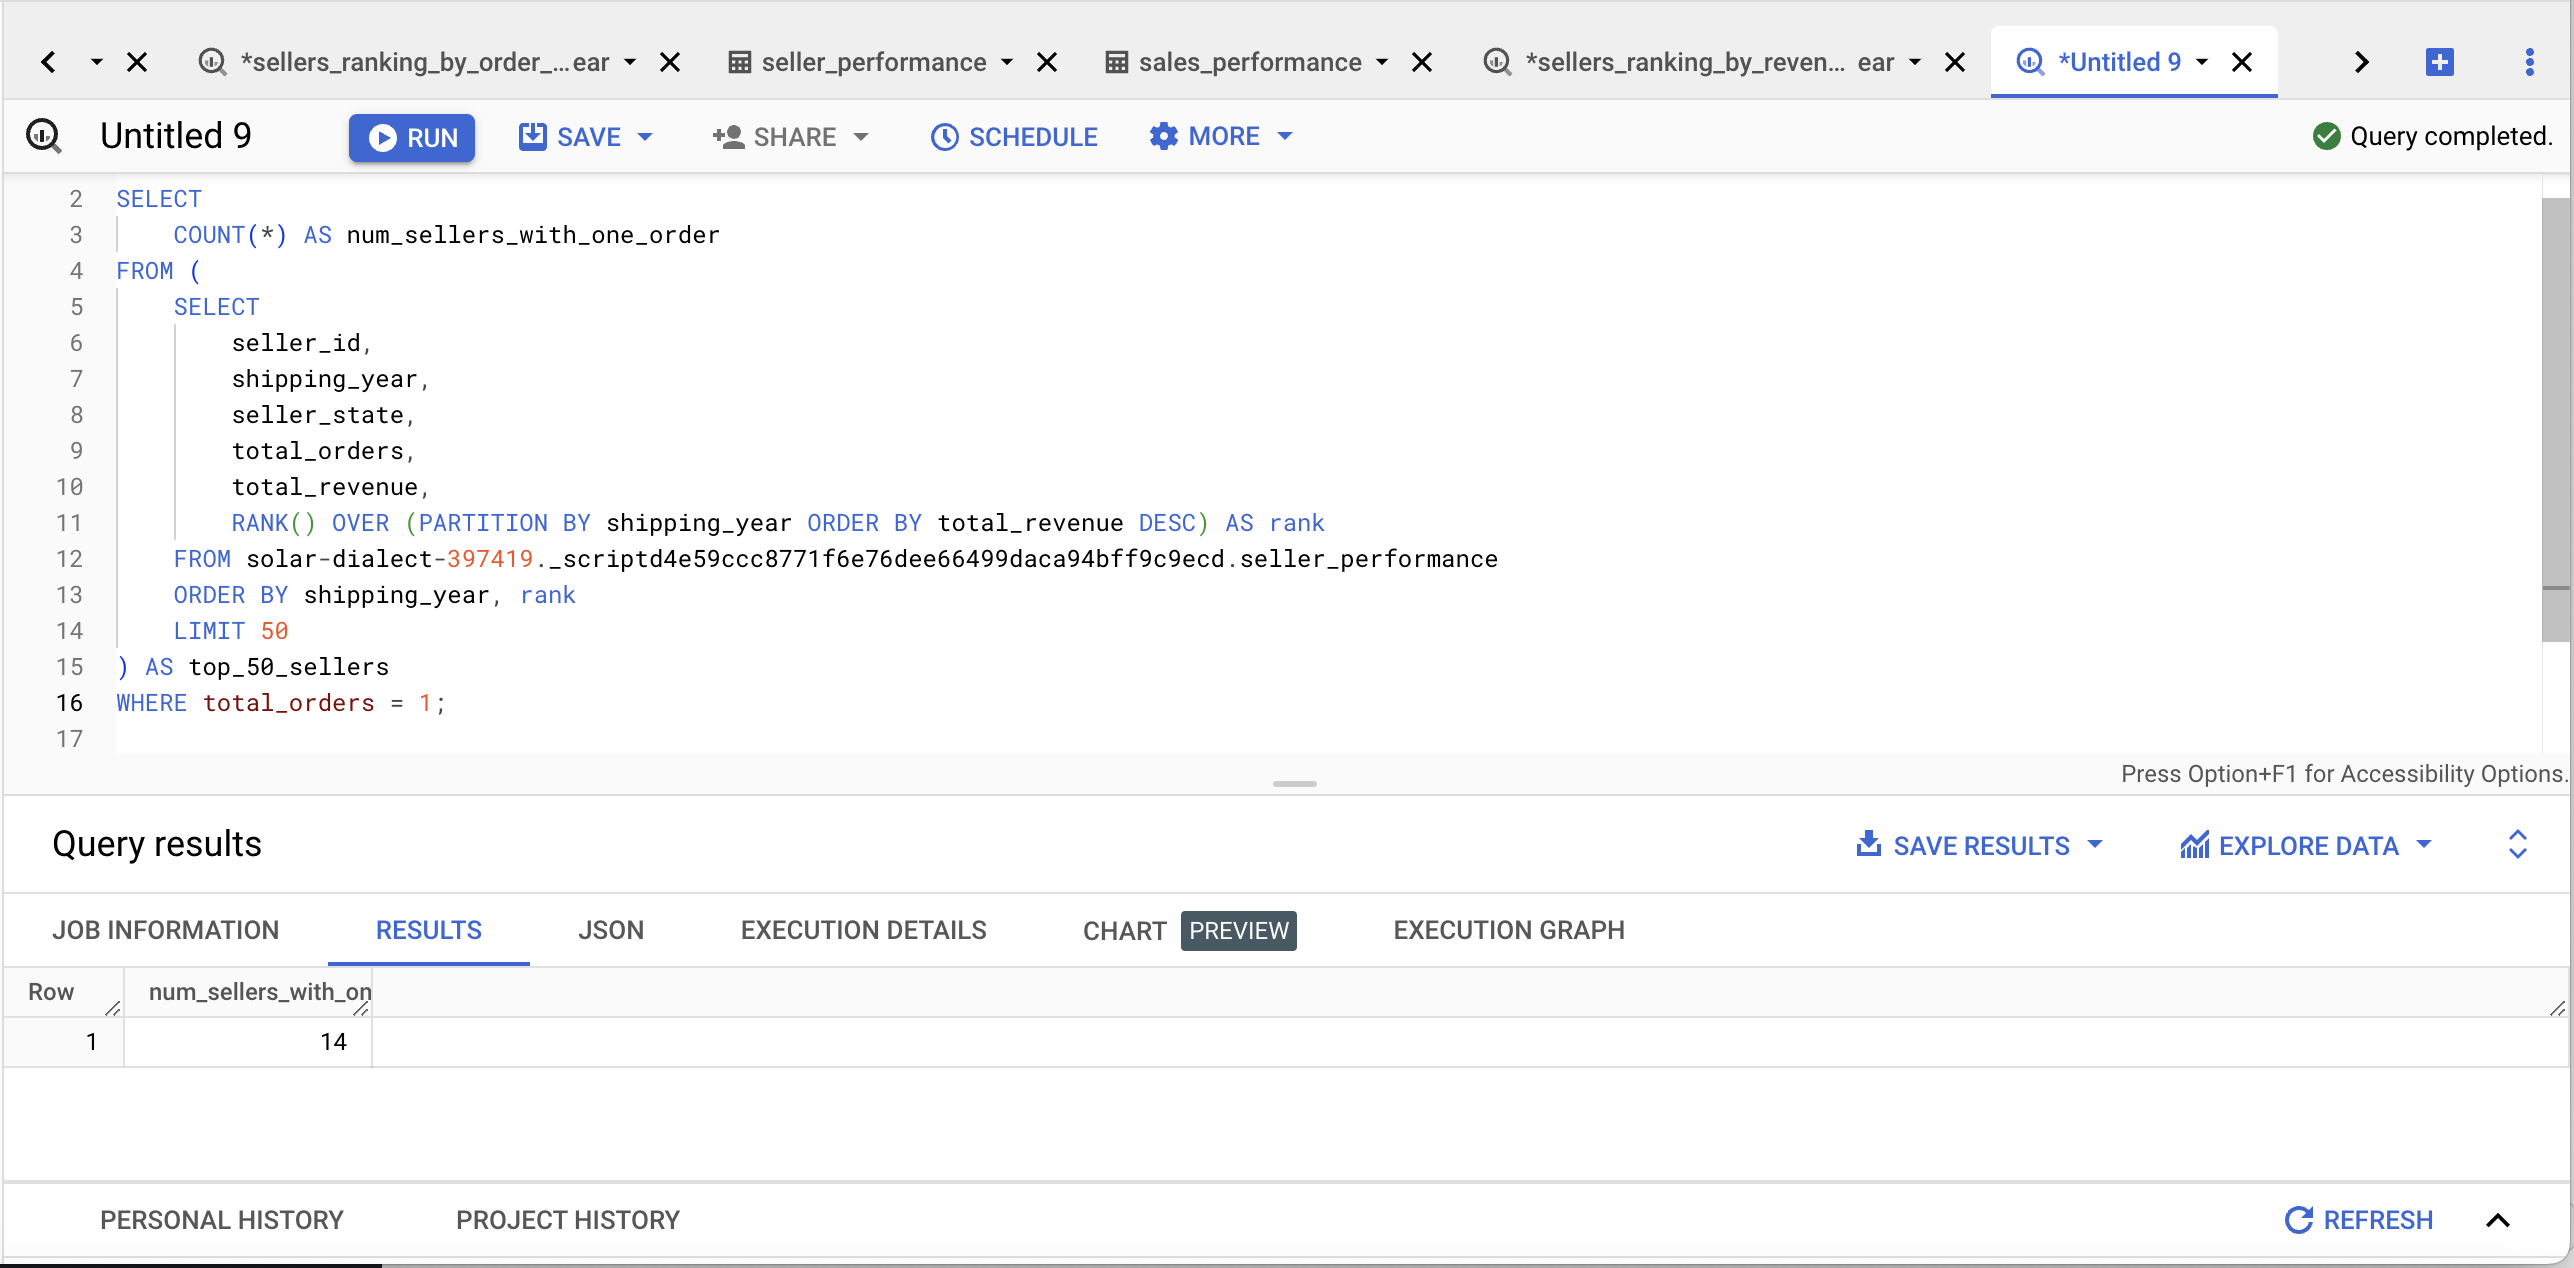

**Analise 2: Tendências de vendas por categoria de produto**

**Objetivo: Entender quais categorias de produtos são mais populares**

In [ ]:
# product_category_performance

WITH TopOrders AS (
  SELECT product_category_name,
         COUNT(order_id) AS total_orders
  FROM solar-dialect-397419.e_commerce.sales_performance
  GROUP BY product_category_name
  ORDER BY total_orders DESC
  LIMIT 20
),
TopRevenue AS (
  SELECT product_category_name,
         ROUND(SUM(price), 2) AS total_revenue
  FROM solar-dialect-397419.e_commerce.sales_performance
  GROUP BY product_category_name
  ORDER BY total_revenue DESC
  LIMIT 20
)
SELECT t1.product_category_name, t1.total_orders, t2.total_revenue
FROM TopOrders t1
INNER JOIN TopRevenue t2 ON t1.product_category_name = t2.product_category_name
ORDER BY t1.total_orders DESC, t2.total_revenue DESC;

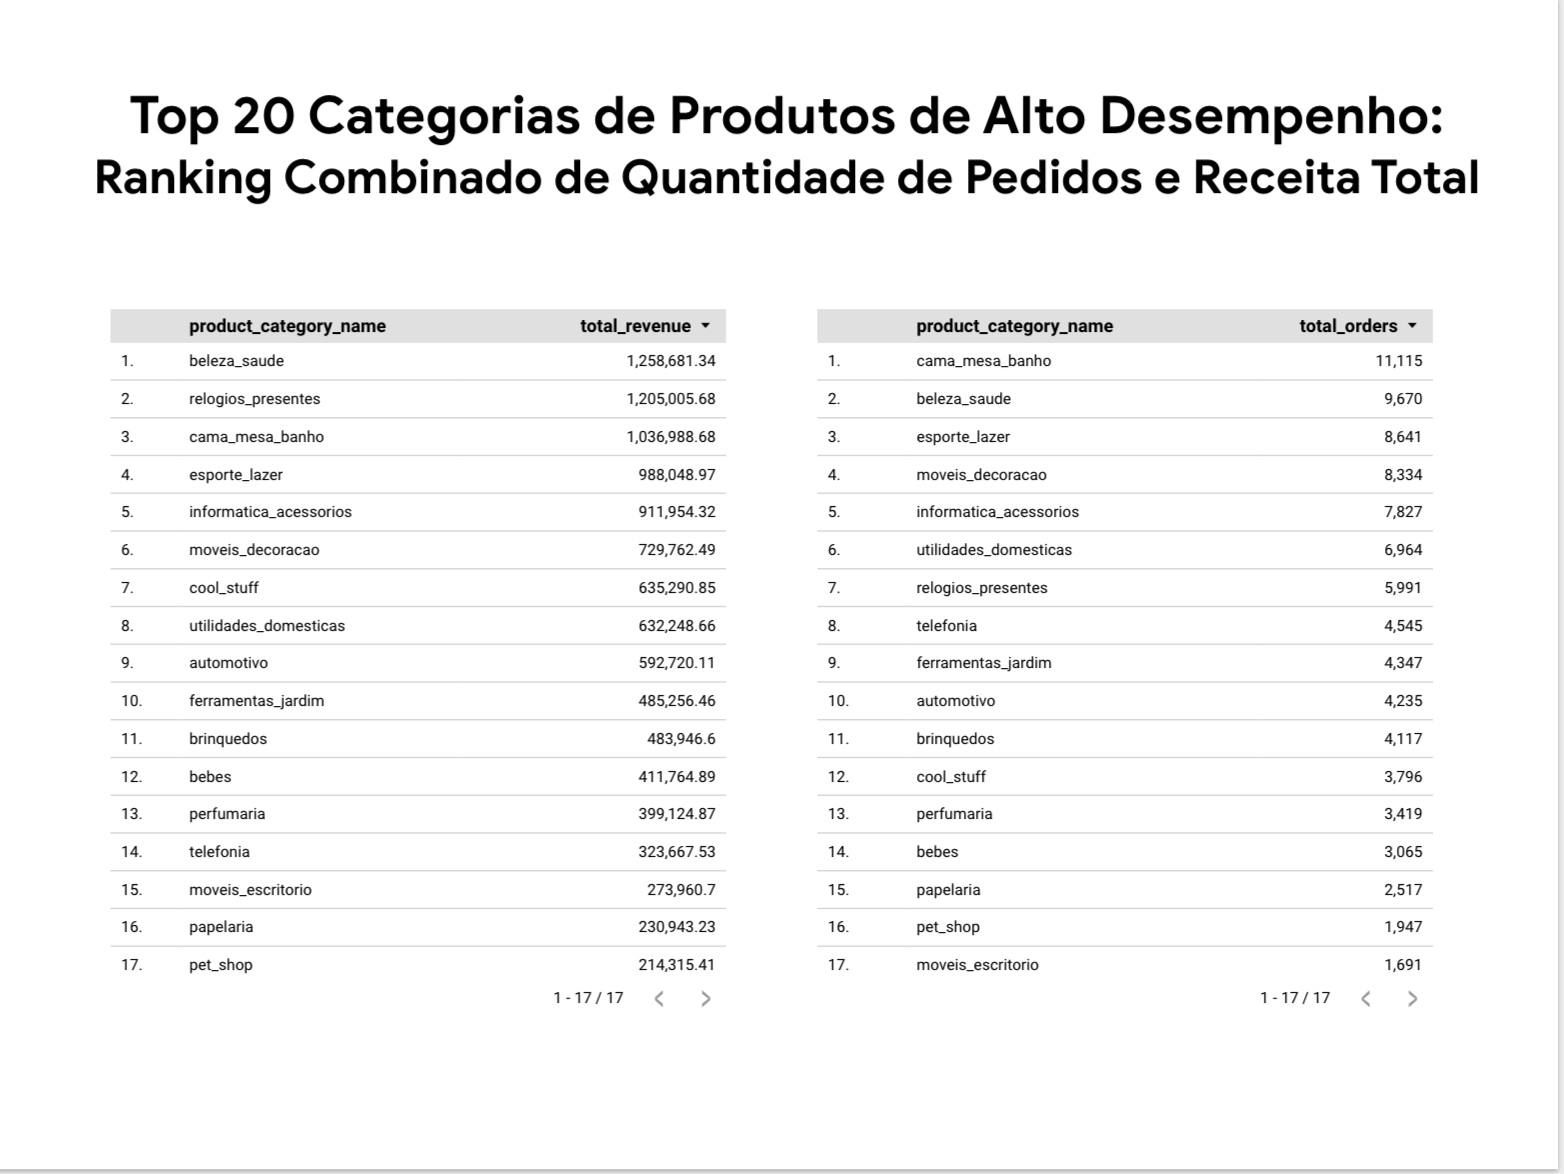

## **2nd Pergunta: Com base no desempenho ao longo dos anos, como estão os custos de frete**

Análise de Tendências Temporais

* Princípio da Análise: Realizar análises mensais e anuais para entender as variações no volume de vendas, receita e custos de frete.
* Objetivo: Identificar as tendências temporais nas vendas, receita e custos de frete para permitir previsões de negócios e alocação de recursos mais eficazes.

Essas análises ajudarão:

1. Previsão de Desempenho: Observando as vendas, receitas e custos de frete em diferentes períodos de tempo, você poderá prever o desempenho futuro.
2. Alocação de Recursos: Entender as tendências desses três indicadores (vendas, receitas, custos de frete) ajuda na alocação mais eficaz de recursos.
3. Ajuste de Estratégia: Esses dados podem ajudar você a identificar áreas de negócio que precisam ser melhoradas ou mantidas.
4. Controle de Custos: Analisar as tendências dos custos de frete contribui para o controle de custos e a otimização da cadeia de suprimentos.

In [ ]:
SELECT
    month_year,
    COUNT(sales_quantity) AS `Sales Quantity`,
    SUM(revenue) AS `Revenue`,
    SUM(freight_cost) AS `Freight Cost`
FROM solar-dialect-397419.e_commerce.trend_analysis
GROUP BY month_year
ORDER BY month_year;

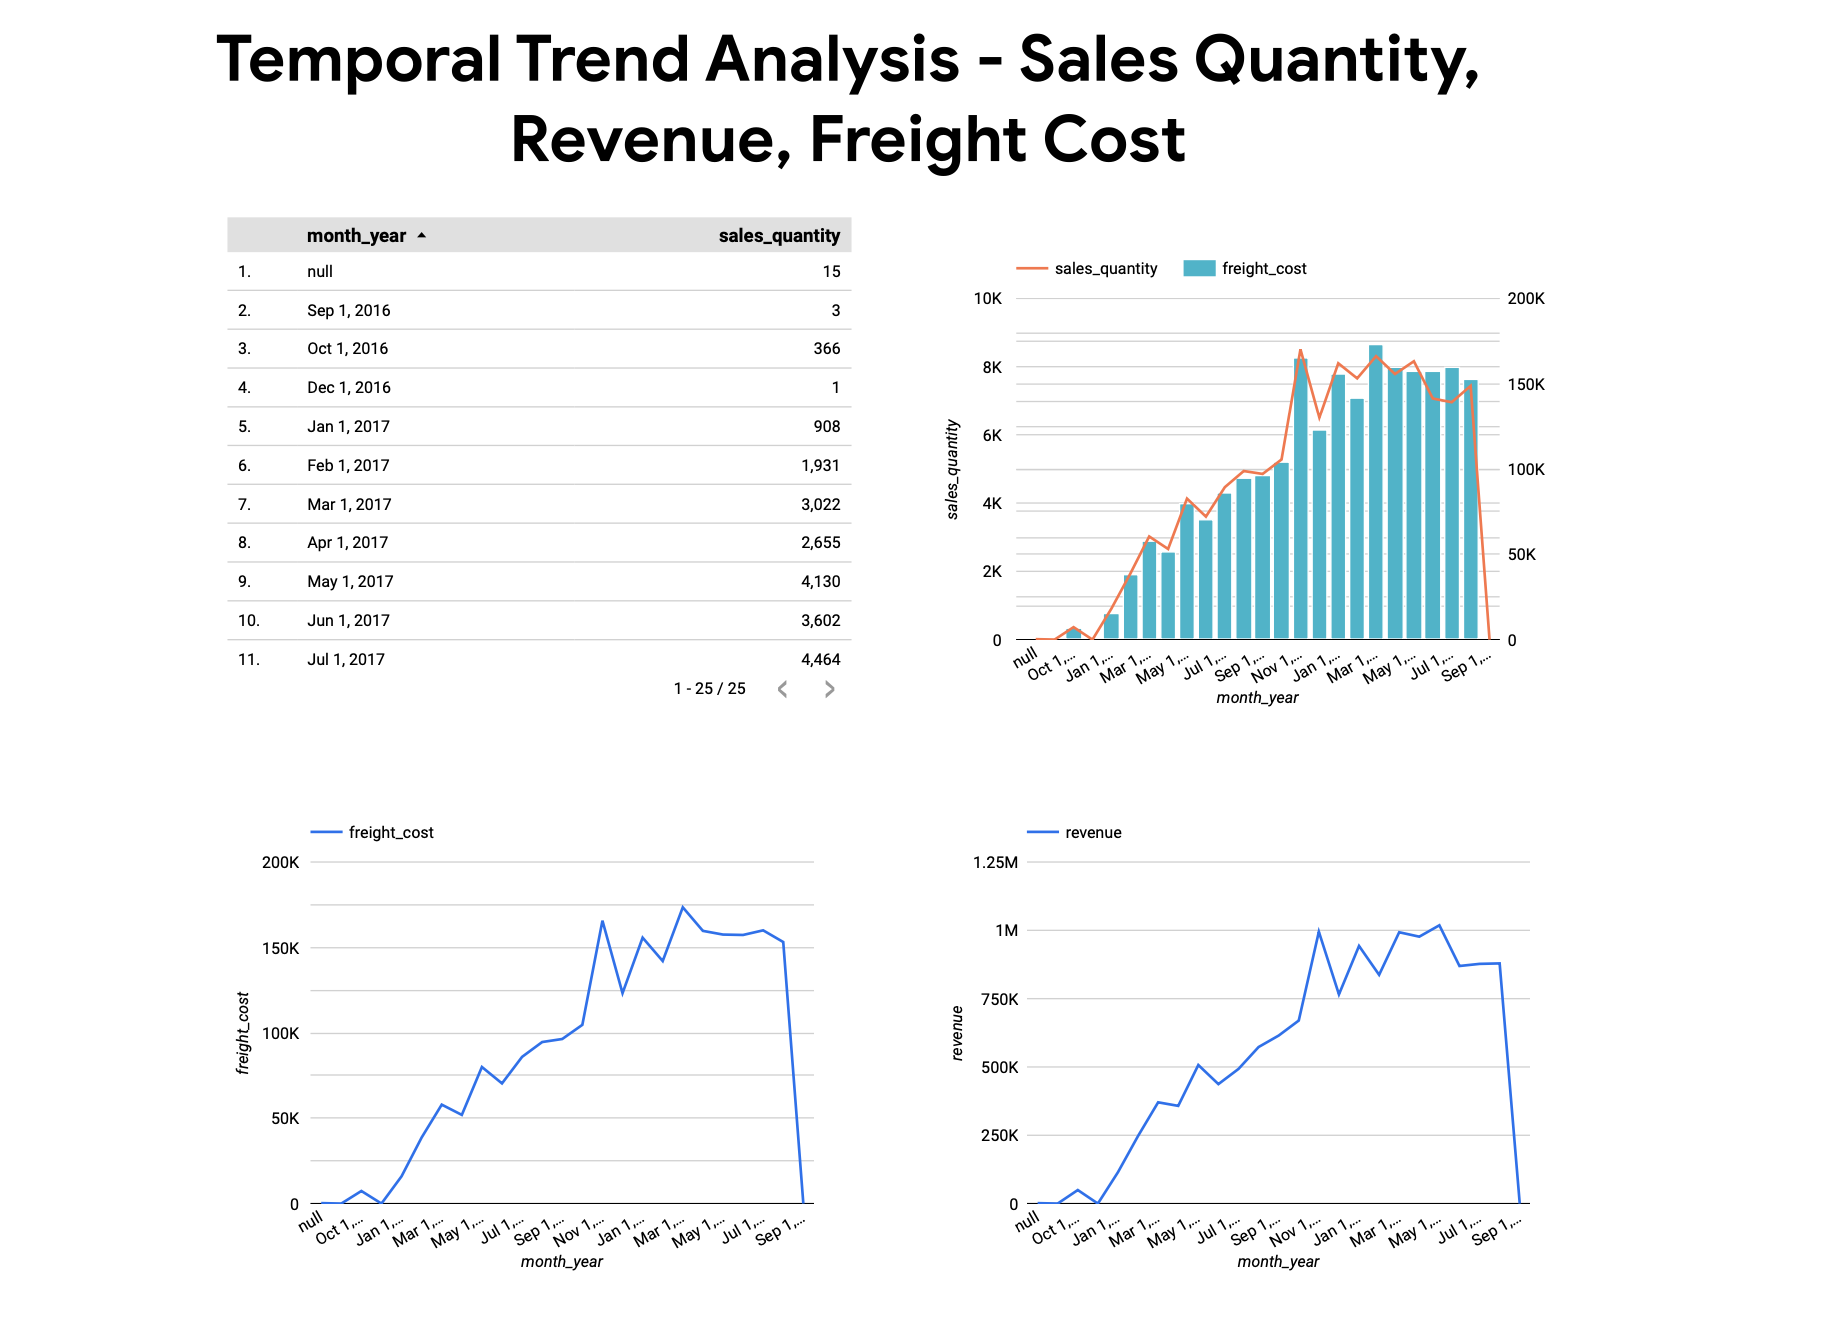

## **3rd Pergunta: Como os clientes reagem ao tempo de entrega?**

**Tabela criada no Dataprep e output no BigQuery**

Neste ponto, uma linha foi removida porque todos os dados se concentravam entre os anos de 2016 e 2018. A única exceção foi uma linha do ano de 2020, que foi identificada como um valor atípico (outlier).

Data processing in Dataprep

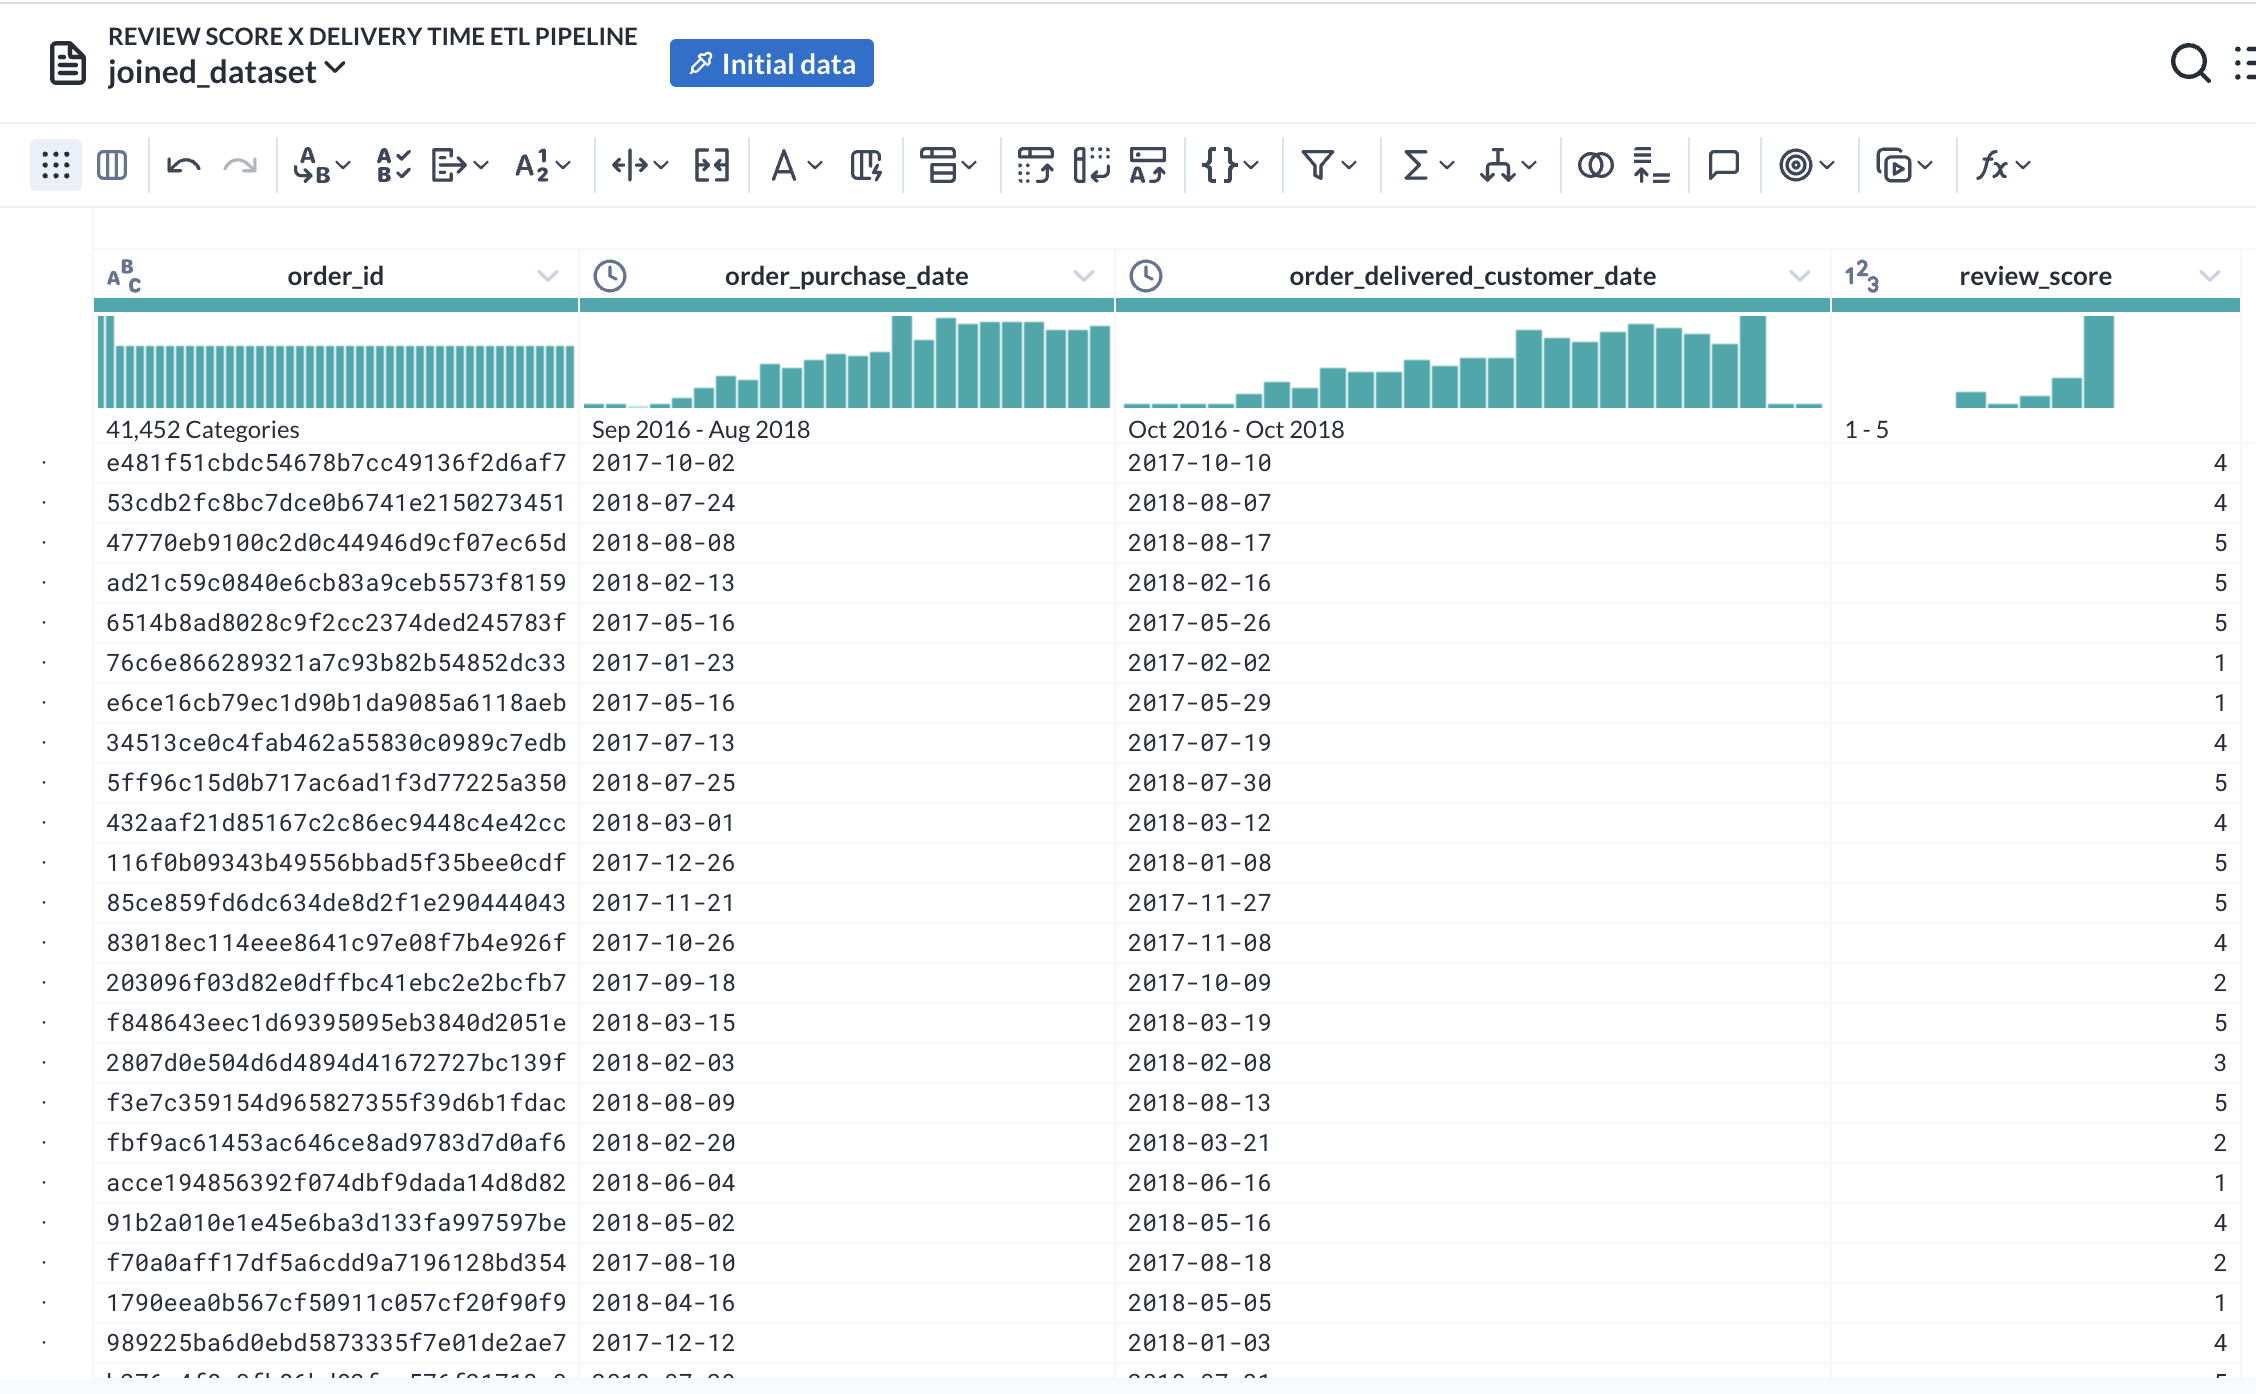

Análise do Tempo Médio de Entrega por Estado

Objetivo: Compreender o tempo médio de entrega para otimizar a logística e aumentar a satisfação do cliente.

In [ ]:
SELECT
    CEIL(AVG(TIMESTAMP_DIFF(TIMESTAMP(order_delivered_customer_date), TIMESTAMP(order_purchase_date), HOUR)) / 24) AS avg_delivery_time_days,
    review_score
FROM
    solar-dialect-397419.e_commerce.joined_dataset
GROUP BY review_score

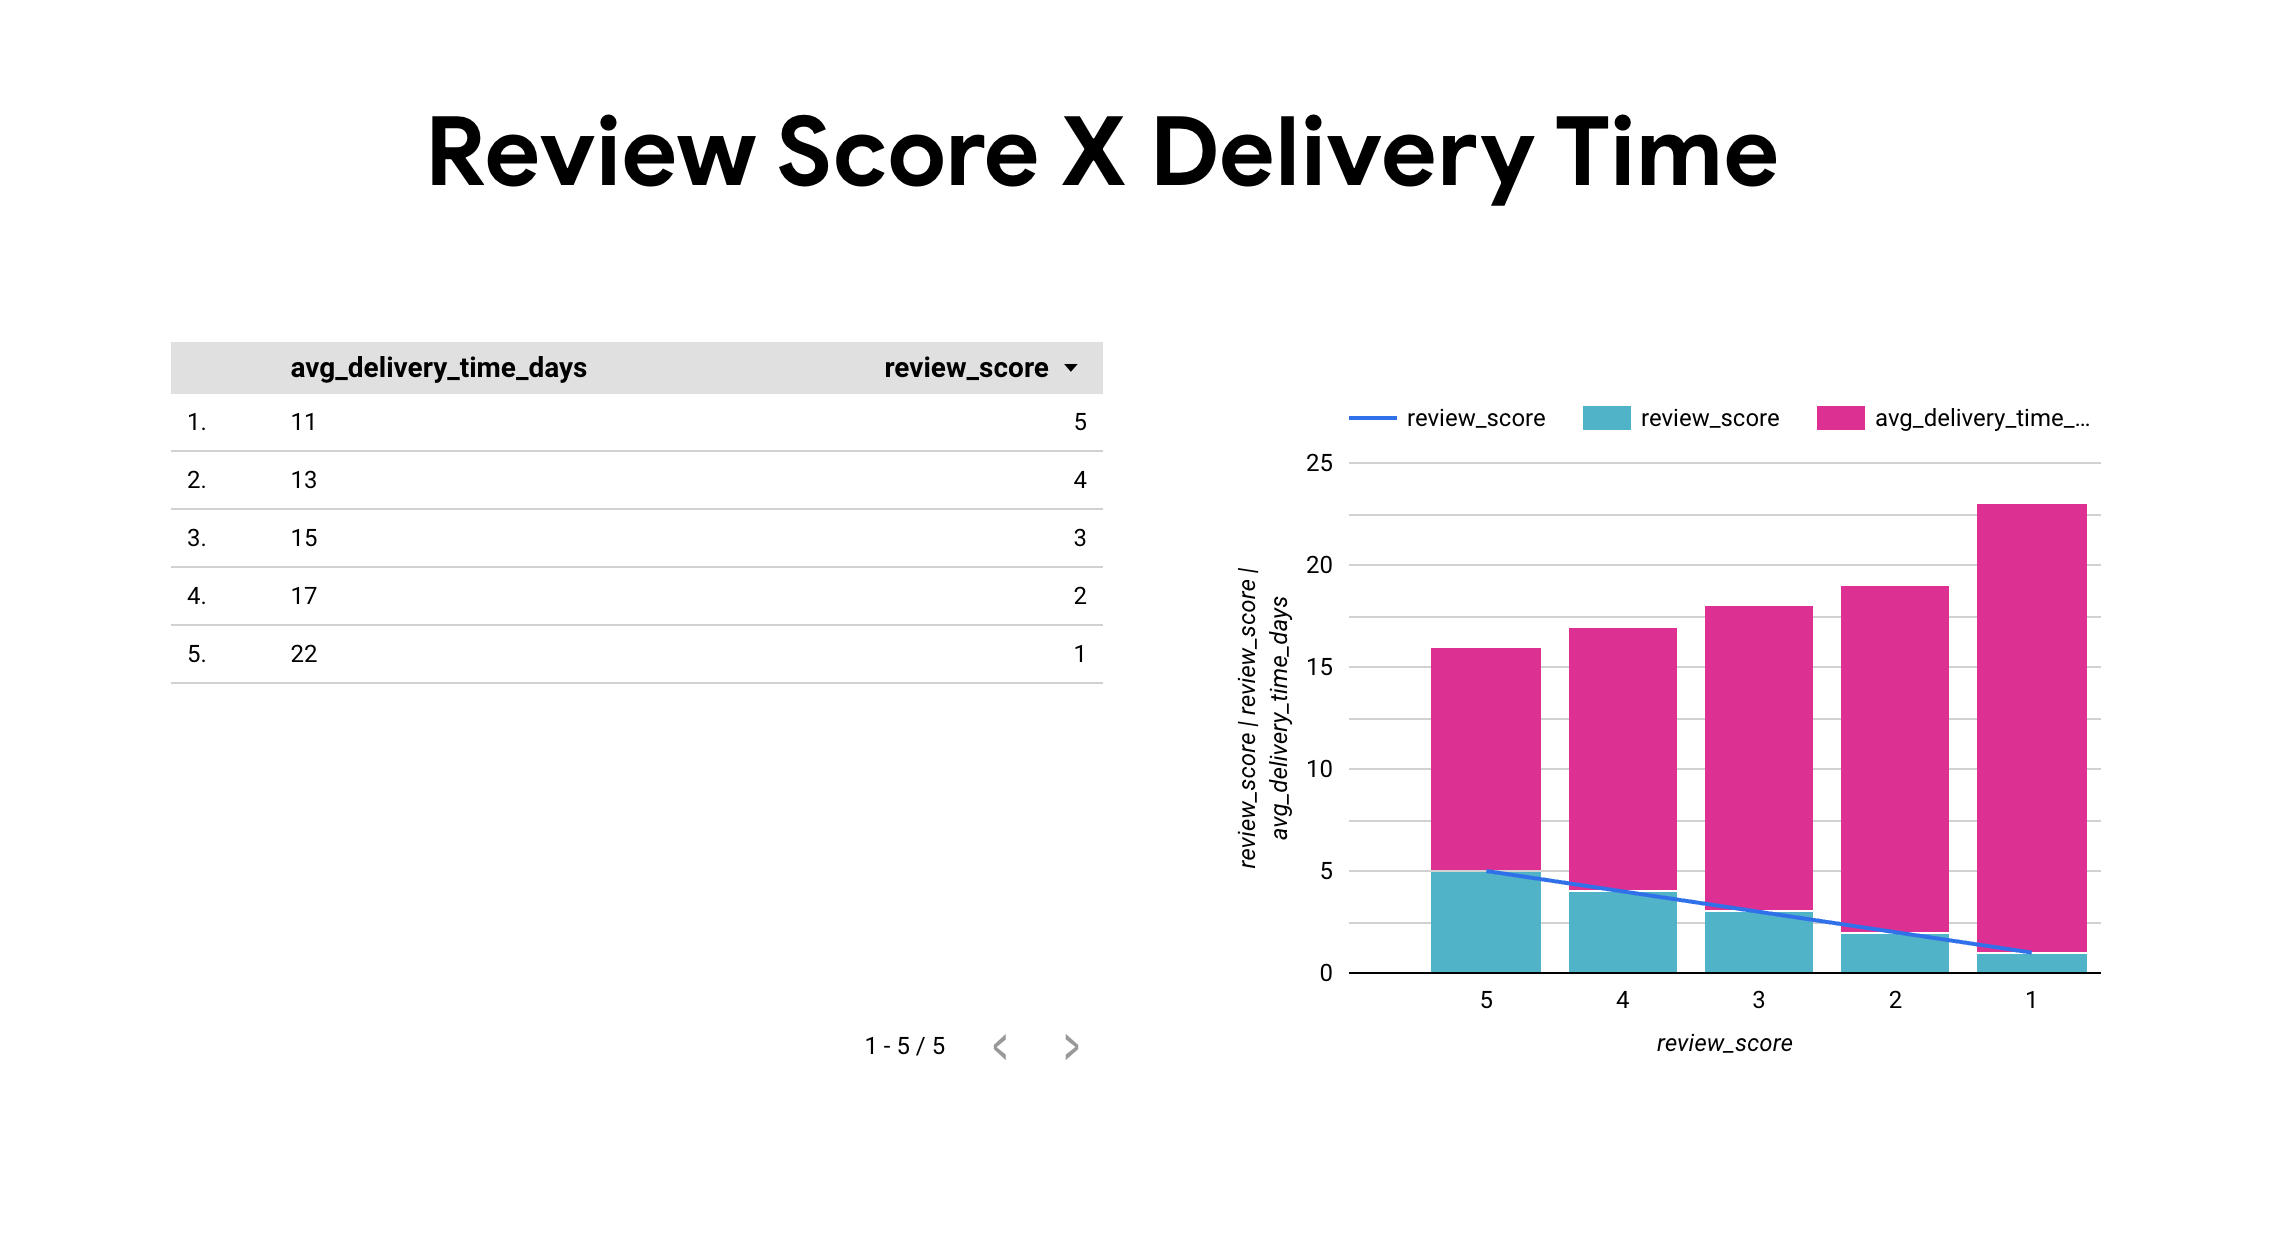

#**Autoavaliação**

Para este projeto, aprendi não apenas todo o processo de construção do ETL (Extração, Transformação e Carregamento), mas também tive sucesso em implementar esses fluxos na nuvem do Google Cloud Platform. Este projeto é uma simulação prática com base em comércio eletrônico, mas como estou usando uma conta de teste, há certas limitações de recursos. Portanto, optei por definir apenas três questões analíticas principais. A vantagem é que não preciso usar todo o conjunto de dados para a análise. Durante a análise de dados com o BigQuery, ganhei muita experiência valiosa em termos da disponibilidade de dados. Pelo menos depois de responder a essas três questões, percebi que cada uma delas tem o potencial para análises mais profundas.

A seguir, vou discutir em detalhes a autoavaliação após cada questão analítica, incluindo os desafios que enfrentei durante essas análises e as direções para otimizações futuras.

**Em relação à primeira análise da primeira pergunta**, consegui obter um ranking de desempenho dos vendedores com base no volume de vendas e no valor das vendas. No entanto, para tornar esta análise mais útil e profunda, uma abordagem mais abrangente seria primeiro calcular a média de vendas ao longo dos anos anteriores. Em seguida, eu poderia comparar quanto as vendas de 2018 excedem essa média em termos percentuais e focar especialmente nos vendedores que têm desempenho acima da média. Isso permitiria que eu entendesse por que esses vendedores estão se saindo melhor do que a média, fornecendo assim direções e estratégias para melhorias.

**Em relação à segunda análise da primeira questão**, consegui fornecer insights valiosos para a camada de tomada de decisão da empresa, indicando quais produtos são não apenas mais lucrativos, mas também mais populares no mercado. No entanto, ainda há espaço para aprofundar essa análise. Por exemplo, poderíamos examinar mais detalhadamente as tendências de crescimento de vendas dos 20 produtos mais vendidos ao longo dos anos. Isso não apenas forneceria uma visão mais completa do mercado, mas também ajudaria a empresa a planejar estratégias de vendas mais precisas para o futuro.

**Em relação à segunda pergunta**, consegui analisar claramente que os custos de transporte estão intimamente ligados ao crescimento proporcional das vendas e do volume de vendas. No entanto, ainda há espaço para melhorias nessa análise. Podemos investigar ainda mais, por exemplo, qual é a porcentagem do desempenho de vendas em áreas onde os custos de transporte são particularmente altos em relação ao total de vendas. Esta análise mais detalhada fornecerá informações adicionais valiosas para a tomada de decisões da empresa, como a necessidade de ajustar estratégias de logística ou de vendas.

**Em relação à terceira pergunta**, consegui analisar em detalhes que a pontuação das avaliações dos clientes tem uma relação inversa significativa com o tempo de entrega. No entanto, para tornar esta análise mais valiosa, sugiro que estudemos mais a fundo o tempo médio de entrega em cada estado e como estão as avaliações nesses locais. Essa análise mais aprofundada por região nos ajudará a ajustar e otimizar com mais precisão as estratégias de transporte e atendimento ao cliente, aumentando assim a satisfação dos clientes.